In [1]:
!python -m pip install seaborn

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Read and Prepare Data

In [3]:
df = pd.read_csv("C:/Users/mekho/Documents/PycharmProjects/LinkedIn_Quiz/data/Food/wrangled_data.csv")

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,16,27,28,29,30,37,38,39,43,44,45,99,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(230875, 178)

In [5]:
df.head()

Unnamed: 0  DISPCODE  SEQNO STATERE1 SAFETIME HHADULT GENHLTH  PHYSHLTH  \
0           0       NaN    NaN      NaN      NaN     NaN     NaN       NaN   
1           1       NaN    NaN      NaN      NaN     NaN     NaN       NaN   
2           2       NaN    NaN      NaN      NaN     NaN     NaN       NaN   
3           3       NaN    NaN      NaN      NaN     NaN     NaN       NaN   
4           4       NaN    NaN      NaN      NaN     NaN     NaN       NaN   

   MENTHLTH POORHLTH  ...  _PAREC1  _PASTAE1  _RFSEAT2  _RFSEAT3  _FLSHOT6  \
0       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   
1       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   
2       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   
3       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   
4       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   

  _PNEUMO2 _AIDTST3 _MMSAWT MMSANAME  _MMSA  
0      NaN      NaN     NaN      NaN    NaN  
1      NaN      NaN     NaN      NaN    NaN  
2      NaN      NaN     NaN      NaN    NaN  
3      NaN      NaN     NaN      NaN    NaN  
4      NaN      NaN     NaN      NaN    NaN  

[5 rows x 178 columns]

In [6]:
names = [str(n).split(',')[0].strip() for n in df.MMSANAME]

df['city'] = names

df = df.loc[df.city != 'nan', :].copy()

In [7]:
df.head()

Unnamed: 0  DISPCODE         SEQNO STATERE1 SAFETIME HHADULT GENHLTH  \
512         512    1200.0  2.017000e+09                 1      01       1   
513         513    1200.0  2.017000e+09                 1      02       1   
514         514    1200.0  2.017000e+09                 1      01       4   
515         515    1200.0  2.017000e+09                 1               2   
516         516    1200.0  2.017000e+09                 1               4   

     PHYSHLTH  MENTHLTH POORHLTH  ...  _PASTAE1  _RFSEAT2  _RFSEAT3  _FLSHOT6  \
512      88.0      88.0           ...       9.0       9.0       9.0             
513      88.0      88.0           ...       1.0       1.0       1.0             
514      88.0      30.0       30  ...       1.0       1.0       1.0             
515      88.0       5.0       02  ...       2.0       1.0       1.0             
516      30.0      10.0       15  ...       9.0       9.0       9.0         9   

     _PNEUMO2 _AIDTST3      _MMSAWT  \
512                      247.441661   
513                  2   161.334971   
514                  1   756.699459   
515                  1  1236.323980   
516         9            213.968412   

                                              MMSANAME    _MMSA  \
512  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
513  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
514  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
515  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
516  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   

                        city  
512  Albany-Schenectady-Troy  
513  Albany-Schenectady-Troy  
514  Albany-Schenectady-Troy  
515  Albany-Schenectady-Troy  
516  Albany-Schenectady-Troy  

[5 rows x 179 columns]

In [8]:
df.columns

Index(['Unnamed: 0', 'DISPCODE', 'SEQNO', 'STATERE1', 'SAFETIME', 'HHADULT',
       'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       ...
       '_PASTAE1', '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3',
       '_MMSAWT', 'MMSANAME', '_MMSA', 'city'],
      dtype='object', length=179)

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

DISPCODE         SEQNO STATERE1 SAFETIME HHADULT GENHLTH  PHYSHLTH  \
512    1200.0  2.017000e+09                 1      01       1      88.0   
513    1200.0  2.017000e+09                 1      02       1      88.0   
514    1200.0  2.017000e+09                 1      01       4      88.0   
515    1200.0  2.017000e+09                 1               2      88.0   
516    1200.0  2.017000e+09                 1               4      30.0   

     MENTHLTH POORHLTH  HLTHPLN1  ...  _PASTAE1  _RFSEAT2  _RFSEAT3  _FLSHOT6  \
512      88.0                1.0  ...       9.0       9.0       9.0             
513      88.0                1.0  ...       1.0       1.0       1.0             
514      30.0       30       1.0  ...       1.0       1.0       1.0             
515       5.0       02       1.0  ...       2.0       1.0       1.0             
516      10.0       15       1.0  ...       9.0       9.0       9.0         9   

    _PNEUMO2 _AIDTST3      _MMSAWT  \
512                     247.441661   
513                 2   161.334971   
514                 1   756.699459   
515                 1  1236.323980   
516        9            213.968412   

                                              MMSANAME    _MMSA  \
512  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
513  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
514  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
515  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
516  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   

                        city  
512  Albany-Schenectady-Troy  
513  Albany-Schenectady-Troy  
514  Albany-Schenectady-Troy  
515  Albany-Schenectady-Troy  
516  Albany-Schenectady-Troy  

[5 rows x 178 columns]

In [11]:
columns_to_select = [c for c in df.columns if c.startswith('_')]
columns_to_select = ['city'] + columns_to_select
df = df.loc[:, columns_to_select]

In [12]:
df.head()

city _URBNRRL   _STSTR  _IMPSEX  _RFHLTH  _PHYS14D  \
512  Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
513  Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
514  Albany-Schenectady-Troy        3  17069.0      1.0      2.0       1.0   
515  Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
516  Albany-Schenectady-Troy        3  17069.0      2.0      2.0       3.0   

     _MENT14D  _HCVU651  _RFHYPE5  _CHOLCH1  ... _PASTRNG _PAREC1  _PASTAE1  \
512       1.0       1.0       1.0       1.0  ...      9.0     9.0       9.0   
513       1.0       1.0       1.0       1.0  ...      1.0     1.0       1.0   
514       3.0       1.0       2.0       1.0  ...      1.0     1.0       1.0   
515       2.0       1.0       1.0       1.0  ...      2.0     4.0       2.0   
516       2.0       9.0       1.0       1.0  ...      9.0     9.0       9.0   

     _RFSEAT2  _RFSEAT3 _FLSHOT6 _PNEUMO2 _AIDTST3      _MMSAWT    _MMSA  
512       9.0       9.0                              247.441661  10580.0  
513       1.0       1.0                          2   161.334971  10580.0  
514       1.0       1.0                          1   756.699459  10580.0  
515       1.0       1.0                          1  1236.323980  10580.0  
516       9.0       9.0        9        9            213.968412  10580.0  

[5 rows x 71 columns]

In [13]:
df.set_index('city', inplace=True)

In [14]:
df.head()

_URBNRRL   _STSTR  _IMPSEX  _RFHLTH  _PHYS14D  \
city                                                                    
Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
Albany-Schenectady-Troy        3  17069.0      1.0      2.0       1.0   
Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
Albany-Schenectady-Troy        3  17069.0      2.0      2.0       3.0   

                         _MENT14D  _HCVU651  _RFHYPE5  _CHOLCH1 _RFCHOL1  ...  \
city                                                                      ...   
Albany-Schenectady-Troy       1.0       1.0       1.0       1.0        1  ...   
Albany-Schenectady-Troy       1.0       1.0       1.0       1.0        1  ...   
Albany-Schenectady-Troy       3.0       1.0       2.0       1.0        2  ...   
Albany-Schenectady-Troy       2.0       1.0       1.0       1.0        1  ...   
Albany-Schenectady-Troy       2.0       9.0       1.0       1.0        1  ...   

                        _PASTRNG  _PAREC1  _PASTAE1  _RFSEAT2 _RFSEAT3  \
city                                                                     
Albany-Schenectady-Troy      9.0      9.0       9.0       9.0      9.0   
Albany-Schenectady-Troy      1.0      1.0       1.0       1.0      1.0   
Albany-Schenectady-Troy      1.0      1.0       1.0       1.0      1.0   
Albany-Schenectady-Troy      2.0      4.0       2.0       1.0      1.0   
Albany-Schenectady-Troy      9.0      9.0       9.0       9.0      9.0   

                        _FLSHOT6 _PNEUMO2 _AIDTST3      _MMSAWT    _MMSA  
city                                                                      
Albany-Schenectady-Troy                              247.441661  10580.0  
Albany-Schenectady-Troy                          2   161.334971  10580.0  
Albany-Schenectady-Troy                          1   756.699459  10580.0  
Albany-Schenectady-Troy                          1  1236.323980  10580.0  
Albany-Schenectady-Troy        9        9            213.968412  10580.0  

[5 rows x 70 columns]

## Exploration

In [15]:
dict_col_unique_counts = {}

In [16]:
for c in df.columns:
    print('')
    print(c)
    print(len(df[c].unique()))
    dict_col_unique_counts[c] = len(df[c].unique())
    


_URBNRRL
9

_STSTR
1371

_IMPSEX
2

_RFHLTH
3

_PHYS14D
4

_MENT14D
4

_HCVU651
3

_RFHYPE5
3

_CHOLCH1
4

_RFCHOL1
3

_MICHD
3

_LTASTH1
3

_CASTHM1
3

_ASTHMS1
4

_DRDXAR1
3

_LMTACT1
5

_LMTWRK1
5

_LMTSCL1
6

_PRACE1
19

_MRACE1
19

_HISPANC
3

_RACE
9

_RACEG21
3

_RACEGR3
6

_AGEG5YR
14

_AGE65YR
3

_AGE80
63

_AGE_G
6

_BMI5
3281

_BMI5CAT
5

_RFBMI5
3

_EDUCAG
5

_INCOMG
6

_SMOKER3
5

_RFSMOK3
3

_ECIGSTS
5

_CURECIG
3

_RFBING5
3

_DRNKWEK
235

_RFDRHV5
3

_MISFRT1
3

_MISVEG1
4

_FRTRES1
2

_VEGRES1
2

_FRUTSU1
504

_VEGESU1
1357

_FRTLT1A
3

_VEGLT1A
3

_FRT16A
2

_VEG23A
2

_FRUITE1
3

_VEGETE1
3

_TOTINDA
3

_MINAC11
673

_MINAC21
533

_PACAT1
5

_PAINDX1
3

_PA150R2
4

_PA300R2
4

_PA30021
3

_PASTRNG
3

_PAREC1
5

_PASTAE1
3

_RFSEAT2
3

_RFSEAT3
3

_FLSHOT6
4

_PNEUMO2
4

_AIDTST3
4

_MMSAWT
151809

_MMSA
135


In [17]:
dict_col_unique_counts

{'_URBNRRL': 9,
 '_STSTR': 1371,
 '_IMPSEX': 2,
 '_RFHLTH': 3,
 '_PHYS14D': 4,
 '_MENT14D': 4,
 '_HCVU651': 3,
 '_RFHYPE5': 3,
 '_CHOLCH1': 4,
 '_RFCHOL1': 3,
 '_MICHD': 3,
 '_LTASTH1': 3,
 '_CASTHM1': 3,
 '_ASTHMS1': 4,
 '_DRDXAR1': 3,
 '_LMTACT1': 5,
 '_LMTWRK1': 5,
 '_LMTSCL1': 6,
 '_PRACE1': 19,
 '_MRACE1': 19,
 '_HISPANC': 3,
 '_RACE': 9,
 '_RACEG21': 3,
 '_RACEGR3': 6,
 '_AGEG5YR': 14,
 '_AGE65YR': 3,
 '_AGE80': 63,
 '_AGE_G': 6,
 '_BMI5': 3281,
 '_BMI5CAT': 5,
 '_RFBMI5': 3,
 '_EDUCAG': 5,
 '_INCOMG': 6,
 '_SMOKER3': 5,
 '_RFSMOK3': 3,
 '_ECIGSTS': 5,
 '_CURECIG': 3,
 '_RFBING5': 3,
 '_DRNKWEK': 235,
 '_RFDRHV5': 3,
 '_MISFRT1': 3,
 '_MISVEG1': 4,
 '_FRTRES1': 2,
 '_VEGRES1': 2,
 '_FRUTSU1': 504,
 '_VEGESU1': 1357,
 '_FRTLT1A': 3,
 '_VEGLT1A': 3,
 '_FRT16A': 2,
 '_VEG23A': 2,
 '_FRUITE1': 3,
 '_VEGETE1': 3,
 '_TOTINDA': 3,
 '_MINAC11': 673,
 '_MINAC21': 533,
 '_PACAT1': 5,
 '_PAINDX1': 3,
 '_PA150R2': 4,
 '_PA300R2': 4,
 '_PA30021': 3,
 '_PASTRNG': 3,
 '_PAREC1': 5,
 '_PASTAE1':

## Data Transformation

### Fill Na

In [18]:
df = df.astype(str)

In [19]:
for col in df.columns:
    df[col] = df[col].str.strip()

In [20]:
np.where(df.applymap(lambda x: x == ''))

(array([     0,      0,      0, ..., 230361, 230362, 230362], dtype=int64),
 array([28, 29, 44, ..., 66, 65, 66], dtype=int64))

In [21]:
for col in df.columns:
    df[col] = df[col].replace("", "-1.0")
    df[col] = df[col].replace("nan", "-1.0")

In [22]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [23]:
df.head()

_URBNRRL   _STSTR _IMPSEX _RFHLTH _PHYS14D _MENT14D  \
city                                                                          
Albany-Schenectady-Troy      3.0  17069.0     2.0     1.0      1.0      1.0   
Albany-Schenectady-Troy      3.0  17069.0     2.0     1.0      1.0      1.0   
Albany-Schenectady-Troy      3.0  17069.0     1.0     2.0      1.0      3.0   
Albany-Schenectady-Troy      3.0  17069.0     2.0     1.0      1.0      2.0   
Albany-Schenectady-Troy      3.0  17069.0     2.0     2.0      3.0      2.0   

                        _HCVU651 _RFHYPE5 _CHOLCH1 _RFCHOL1  ... _PASTRNG  \
city                                                         ...            
Albany-Schenectady-Troy      1.0      1.0      1.0        1  ...      9.0   
Albany-Schenectady-Troy      1.0      1.0      1.0        1  ...      1.0   
Albany-Schenectady-Troy      1.0      2.0      1.0        2  ...      1.0   
Albany-Schenectady-Troy      1.0      1.0      1.0        1  ...      2.0   
Albany-Schenectady-Troy      9.0      1.0      1.0        1  ...      9.0   

                        _PAREC1 _PASTAE1 _RFSEAT2 _RFSEAT3 _FLSHOT6 _PNEUMO2  \
city                                                                           
Albany-Schenectady-Troy     9.0      9.0      9.0      9.0     -1.0     -1.0   
Albany-Schenectady-Troy     1.0      1.0      1.0      1.0     -1.0     -1.0   
Albany-Schenectady-Troy     1.0      1.0      1.0      1.0     -1.0     -1.0   
Albany-Schenectady-Troy     4.0      2.0      1.0      1.0     -1.0     -1.0   
Albany-Schenectady-Troy     9.0      9.0      9.0      9.0        9        9   

                        _AIDTST3             _MMSAWT    _MMSA  
city                                                           
Albany-Schenectady-Troy     -1.0  247.44166099999998  10580.0  
Albany-Schenectady-Troy        2          161.334971  10580.0  
Albany-Schenectady-Troy        1   756.6994589999999  10580.0  
Albany-Schenectady-Troy        1  1236.3239800000001  10580.0  
Albany-Schenectady-Troy     -1.0          213.968412  10580.0  

[5 rows x 70 columns]

In [24]:
df = df.fillna("-1.0")

In [25]:
df = df.astype(float)

In [26]:
df = df.astype(str)

### Transformation

In [27]:
list_data_transformed = []

In [28]:
def transform_chunk(chunk):
    dict_temp_transformed_data = {}
    print(np.unique(chunk.index)[0])
    print(chunk.shape[0])
    dict_temp_transformed_data['city'] = np.unique(chunk.index)[0]
    for col in chunk.columns:
        if dict_col_unique_counts[col] < 30:
            print(col)
            for cat in list(np.unique(chunk[[col]])):
                print(np.unique(chunk[[col]]))
                print(cat)
                
                dict_temp_transformed_data[col + '_' + str(cat)] = sum((chunk[[col]].values == cat).squeeze()) / len(chunk)
                print(col + '_' + str(cat))
                print(dict_temp_transformed_data[col + '_' + str(cat)])
    list_data_transformed.append(dict_temp_transformed_data)  
    return

In [29]:
sth = df.groupby('city').apply(lambda chunk: transform_chunk(chunk))

Albany-Schenectady-Troy
632
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4477848101265823
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5522151898734177
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8212025316455697
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.17563291139240506
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0031645569620253164
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.634493670886076
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.23734177215189872
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.10759493670886076
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.020569620253164556
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6439873417721519
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.1930379746835443
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.1360759493670886
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.02689873417721519
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.615506329113924
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04746835443037975
['1.0' '2.0'

_INCOMG_4.0
0.1060126582278481
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4810126582278481
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.14082278481012658
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.0949367088607595
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.0379746835443038
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.30854430379746833
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5079113924050633
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.05063291139240506
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8164556962025317
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.13291139240506328
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.05063291139240506
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.011075949367088608
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.0189873417721519
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.09335443037974683
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.819620253164557
['1.0' '2

_RACE_6.0
0.007859733978234583
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.014510278113663845
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.3192261185006046
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.03143893591293833
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.5441354292623942
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.4244256348246675
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.03143893591293833
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5441354292623942
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.012091898428053204
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.07859733978234583
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.014510278113663845
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.3192261185006046
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.03143893591293833
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0'

['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.1235565819861432
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.008083140877598153
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.569284064665127
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04387990762124711
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.38683602771362585
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6085450346420324
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3903002309468822
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0011547344110854503
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8983833718244804
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.02424942263279446
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.03695150115473441
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.04041570438799076
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.08083140877598152
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5612009237875288
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3579676674364896
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.009237875288683603
['-1.0'

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.010392609699769052
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.023094688221709007
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10623556581986143
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8314087759815243
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.028868360277136258
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9376443418013857
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03348729792147806
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.028868360277136258
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8290993071593533
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.12471131639722864
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.046189376443418015
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8983833718244804
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.05658198614318707
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.04503464203233257
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9364896073903002
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.0173210161

_LMTWRK1_-1.0
0.0009718172983479105
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.09620991253644315
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2031098153547133
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6919339164237124
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.007774538386783284
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_LMTSCL1_-1.0
0.0009718172983479105
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_LMTSCL1_1.0
0.06608357628765792
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_LMTSCL1_2.0
0.07677356656948493
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.16423712342079688
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_4.0
0.6919339164237124
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8522837706511176
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.037900874635568516
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.057337220602526724
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0'

_VEGLT1A_2.0
0.13313896987366375
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.0923226433430515
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9261418853255587
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.0738581146744412
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9193391642371235
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.08066083576287658
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7308066083576288
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.19922254616132168
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06997084548104957
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.34402332361516036
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.16812439261418854
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.15451895043731778
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.22351797862001943
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.1098153547133139
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5170068027210885
['1.0' '2.0' '9.0']
2.0
_PAIN

_AGEG5YR_2.0
0.06827445652173914
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.07846467391304347
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.06317934782608696
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.07472826086956522
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.07676630434782608
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.0703125
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09748641304347826
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.09341032608695653
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6953125
['1.0' '2.0' '3.0'

_MENT14D_2.0
0.19153936545240893
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.11750881316098707
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.03172737955346651
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.4864864864864865
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.09048178613396005
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.42303172737955347
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.4970622796709753
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.4982373678025852
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.004700352526439483
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.881316098707403
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.021151586368977675
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.04935370152761457
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.0481786133960047
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.10693301997649823
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.4700352526439483
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.42303172737955347
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_

['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.0481786133960047
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.005875440658049354
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.009400705052878966
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.12338425381903642
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8096357226792009
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05170387779083431
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9330199764982373
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.01527614571092832
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.05170387779083431
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8237367802585194
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.10693301997649823
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06933019976498238
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8801410105757932
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.05405405405405406
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06580493537015276
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8965

_HISPANC_1.0
0.17647058823529413
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.8125
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.011029411764705883
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.664828431372549
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.07107843137254902
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.010416666666666666
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.037377450980392156
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0012254901960784314
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.014705882352941176
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.17647058823529413
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.02389705882352941
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.664828431372549
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.3112745098039216
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.02389705882352941
_RACEGR

['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6219362745098039
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.2113970588235294
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.12316176470588236
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.04350490196078431
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6219362745098039
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.26348039215686275
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06495098039215687
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.04963235294117647
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.08946078431372549
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.33455882352941174
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5545343137254902
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.02144607843137255
Baltimore-Columbia-Towson
5058
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.16627125345986557
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.8337287465401344
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4052985369711348
['1.0' '2.0']


_AGEG5YR_5.0
0.054962435745353894
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06959272439699486
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.09489916963226572
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.10755239224990115
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11783313562672994
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6002372479240806
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3776196124950573
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.022143139580862
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.033214709371293
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.07552392249901146
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.10201660735468565
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4

['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6726342710997443
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0038363171355498722
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.0076726342710997444
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.07672634271099744
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.0959079283887468
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.1432225063938619
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6726342710997443
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0038363171355498722
_PRACE1
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.6176470588235294
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.3312020460358056
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.01918158567774936
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.005115089514066497
['1.0' '2.0' '3.0' '4.0' '6.0' '

_VEGLT1A_9.0
0.13810741687979539
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.8849104859335039
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.11508951406649616
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.8734015345268542
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.1265984654731458
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.59846547314578
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2915601023017903
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.10997442455242967
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.22634271099744246
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.1483375959079284
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.16751918158567775
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.31074168797953966
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.14705882352941177
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.38107416879795397
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4782608695652174
['1.0' '2.0' '9.0']
9.0
_PAINDX

_MRACE1_7.0
0.00966183574879227
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.00322061191626409
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.01288244766505636
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.033816425120772944
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9581320450885669
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.008051529790660225
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.9114331723027376
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.00322061191626409
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.017713365539452495
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.00322061191626409
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.004830917874396135
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.008051529790660225
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.033816425120772944
['1.0' '2.

['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.3107890499194847
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6392914653784219
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.0499194847020934
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.214170692431562
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2753623188405797
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08856682769726248
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3365539452495974
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.0853462157809984
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.214170692431562
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7004830917874396
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.0853462157809984
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.856682769726248
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.0966183574879227
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.04669887278582931
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.7584541062801933
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.19484702093397746
['1.0' '2.0' '

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.12083656080557707
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3338497288923315
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.2238574748257165
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10844306738962045
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.06506584043377227
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.23625096824167313
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5561580170410535
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03408210689388071
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.7924089852827265
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.1735089078233927
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03408210689388071
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.010069713400464756
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.027885360185902403
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.1185127807900852
['1.0' '2.0' '3.0' '4.0' '9.0']


['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.9344115004492363
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.006289308176100629
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.04043126684636118
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.0026954177897574125
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0008984725965858042
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.0008984725965858042
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.0026954177897574125
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0026954177897574125
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.008984725965858042
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.0071877807726864335
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9892183288409704
['1.0' '2.0' '9

['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.26504941599281223
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.1096136567834681
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2551662174303684
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6352201257861635
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.1096136567834681
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.27133872416891286
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6451033243486074
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.08355795148247978
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.16531895777178796
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2785265049415993
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.09613656783468104
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3477088948787062
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11230907457322552
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.16531895777178796
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7223719676549866
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.112309074573

_INCOMG_9.0
0.10421455938697317
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.06896551724137931
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03065134099616858
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2582375478927203
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.6015325670498084
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04061302681992337
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8597701149425288
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.09961685823754789
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04061302681992337
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.00996168582375479
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.019157088122605363
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.11264367816091954
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8130268199233717
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.045210727969348656
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9256704980842911
['1.0' '2.0' '9.0

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0015408320493066256
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.022085259373394967
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.004622496147919877
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.017976373908577297
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.02670775552131484
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.7606574216743708
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.10374935798664613
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.009758602978941962
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.035952747817154594
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0015408320493066256
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.

['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9003595274781715
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6348228043143297
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2778633795582948
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.08731381612737545
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7416538263995891
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14843348741653825
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.10991268618387262
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9126861838726246
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.08731381612737545
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9003595274781715
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.09964047252182845
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7236774524910118
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.20955315870570107
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.0667693888032871
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.29994863893168977
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0

_AGE_G_1.0
0.05415860735009671
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.09671179883945841
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.07736943907156674
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1450676982591876
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.23017408123791103
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3965183752417795
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07156673114119923
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013539651837524178
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3036750483558994
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3404255319148936
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.27079303675048355
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.31721470019342357
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6112185686653772
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07156673114119923
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.0348162475822

_HCVU651_9.0
0.31511254019292606
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6585209003215434
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3389067524115756
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.002572347266881029
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8553054662379421
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.04180064308681672
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.05337620578778135
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.049517684887459806
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.11382636655948553
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5954983922829582
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.2906752411575563
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.0077170418006430866
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.08167202572347267
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9106109324758842
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8231511254019293
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.17234726688102894
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.00450

_AGE_G_2.0
0.12540192926045016
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11832797427652733
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1665594855305466
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.22765273311897105
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.2977491961414791
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07459807073954984
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.014790996784565916
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3221864951768489
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3273311897106109
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.26109324758842445
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3369774919614148
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5884244372990354
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07459807073954984
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.02829581993569132
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2482315112540193
['

9.0
_ASTHMS1_9.0
0.01319710515112814
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.010642826734780758
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.2779906343124734
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.7113665389527458
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.010642826734780758
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.12813963388676033
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.14687100893997446
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.7113665389527458
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.002979991485738612
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.010642826734780758
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.06215410813111963
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2064708386547467
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.7113665389527458
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.009365687526607066
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LM

_FRTRES1_0.0
0.0800340570455513
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9199659429544487
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09748829289059174
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9025117071094083
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6624095359727543
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.25755640698169435
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.0800340570455513
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7535121328224776
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14133673903788846
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.10515112813963388
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0004257130693912303
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9995742869306088
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9195402298850575
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.0800340570455513
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0004257130693912303
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9025117071094083
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.09748829289059174
_TOTINDA
['1.0' 

_AGEG5YR_14.0
0.011022657685241886
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.037966932026944275
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.028169014084507043
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.043478260869565216
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.04592774035517452
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.08450704225352113
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08940600122473974
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.12369871402327005
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0'

['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6722972972972973
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.21621621621621623
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09966216216216216
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.011824324324324325
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6216216216216216
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04054054054054054
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.33783783783783783
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6621621621621622
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3344594594594595
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0033783783783783786
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8260135135135135
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.033783783783783786
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.06418918918918919
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.07601351351351351
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.14358108108108109
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5016891891891891
['

['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8986486486486487
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.04560810810810811
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.05574324324324324
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9273648648648649
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.02533783783783784
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.0472972972972973
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9273648648648649
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.015202702702702704
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.005067567567567568
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.052364864864864864
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.07263513513513513
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9273648648648649
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.07263513513513513
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9273648648648649
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5962837837837838
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3310810810810811
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.072635135

_AGE_G_2.0
0.08946078431372549
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11519607843137254
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17401960784313725
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.2512254901960784
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.34068627450980393
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.08088235294117647
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.00980392156862745
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.20833333333333334
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3272058823529412
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3737745098039216
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2181372549019608
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.7009803921568627
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.08088235294117647
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.09558823529411764
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.3321078431372549
['

['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.1837837837837838
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.65
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.00472972972972973
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.6797297297297298
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.26013513513513514
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.013513513513513514
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.007432432432432433
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.002027027027027027
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.014864864864864866
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0006756756756756757
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.00945945945945946
['1.0' '2.0' '3.0' '4

_RFBING5_2.0
0.13851351351351351
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.051351351351351354
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.870945945945946
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.07364864864864865
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.05540540540540541
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9195945945945946
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.030405405405405407
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9121621621621622
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.030405405405405407
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.008783783783783784
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.04864864864864865
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.0804054054054054
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9195945945945946
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08783783783783784
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9121621621621622
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.

['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.05585106382978723
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9315159574468085
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.012632978723404254
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.6968085106382979
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.17420212765957446
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.011303191489361703
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.011303191489361703
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0013297872340425532
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.005319148936170213
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.02327127659574468
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.05585106382978723
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.020611702127659573
_RACEG21

_PNEUMO2_1.0
0.24002659574468085
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.05851063829787234
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.04454787234042553
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.09242021276595745
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.28856382978723405
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5784574468085106
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.04055851063829787
Chicago-Naperville-Elgin
5122
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.45040999609527527
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.5495900039047247
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.43850058570870754
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5614994142912925
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8088637251073799
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.18918391253416633
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.001952362358453729
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.5915657946114798
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.2688402967590785
['1.0' '2.0' '3.0

['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.07106598984771574
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08766106989457244
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.10171807887543928
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.10288949629051151
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6665365091761031
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.32506833268254587
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.008395158141351035
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.06520890277235455
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.12065599375244045
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11792268645060523
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1614603670441234
['1.0'

['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8520437535981578
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.04087507196315487
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.05411629245826137
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.05296488198042602
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.11456534254461716
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5354058721934369
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.35002878526194586
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.010362694300518135
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.1001727115716753
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.8894645941278065
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8733448474381117
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.12204951065054692
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.004605641911341394
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9027058146229131
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08865860679332183
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.008635578583765112
_ASTHMS1
['1.0' '2.0' '3.0' '

_MISFRT1_0.0
0.9153713298791019
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03051237766263673
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05411629245826137
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9142199194012666
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.018422567645365574
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.009211283822682787
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05814622913068509
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.0846286701208981
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9153713298791019
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08578008059873345
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9142199194012666
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5924006908462867
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3229706390328152
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.0846286701208981
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7559009786989062
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14853195164075994
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.0955670696603339
_FRT16A
['0.0' '1.

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.921724333522405
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.003403289846851957
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.027226318774815655
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.02098695405558707
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.008508224617129892
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.018150879183210438
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.04027226318774816
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.1298922291548497
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09982983550765741
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.07033465683494045
['1.0' '10.0' '11.

_RFSEAT3_1.0
0.7560975609756098
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.15655133295519003
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.08735110606920023
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6080544526375496
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.22688598979013047
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.12251843448667045
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.04254112308564946
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6080544526375496
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.27793533749290983
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06466250709018719
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.049347702779353374
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.09245604083947816
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.2864435621100397
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5916052183777651
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.02949517867271696
Cleveland-Elyria
1133
_URBNRRL
['1.0' '2.0']
1.0
_URBNRR

_AGEG5YR_5.0
0.0617828773168579
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06090026478375993
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08737864077669903
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.10767872903795234
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11120917917034422
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6142983230361871
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3759929390997352
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.009708737864077669
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.04589585172109444
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.08561341571050309
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11650485436893204
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_

['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8282442748091603
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.07061068702290077
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.015267175572519083
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.026717557251908396
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0057251908396946565
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.011450381679389313
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.01717557251908397
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.02480916030534351
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.15458015267175573
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.8435114503816794
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.0019083969465648854
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7213740458015268
['1.0' '2.0' '3.0'

_PASTRNG_2.0
0.6393129770992366
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.10114503816793893
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.17748091603053434
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.26908396946564883
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08015267175572519
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3549618320610687
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.1183206106870229
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.17748091603053434
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7041984732824428
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.1183206106870229
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8874045801526718
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.01717557251908397
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.09541984732824428
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8645038167938931
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.04007633587786259
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.09541984732824428
_FLSHOT6
['-1.0' '1.0' '2.0' 

_EDUCAG_4.0
0.4602510460251046
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.002510460251046025
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.05439330543933055
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.11213389121338913
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08117154811715481
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.09456066945606695
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.48284518828451883
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.17489539748953975
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.08786610878661087
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.029288702928870293
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.26527196652719665
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5305439330543933
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.08702928870292886
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.7958158995815899
['1.0' '2.0' '9.0']
2.0
_RFSM

_ASTHMS1_1.0
0.08624898291293735
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.04068348250610252
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8681855166802278
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.004882017900732303
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.012205044751830757
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3506916192026037
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6371033360455655
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.012205044751830757
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1676159479251424
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.177379983726607
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6371033360455655
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.005695687550854353
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.012205044751830757
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.10414971521562245
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.24165988608624897
['-1.0' '1.0'

['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10170870626525631
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8291293734743694
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.03986981285598047
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9308380797396257
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.029292107404393815
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.03986981285598047
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8234336859235151
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.10821806346623271
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06834825061025224
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.869812855980472
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.05777054515866558
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.07241659886086249
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9137510170870626
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.026851098454027666
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.059397884458909686
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9023596419853539
['0.0

_PRACE1_3.0
0.010329562223315297
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.02262666010821446
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.000983767830791933
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.009837678307919331
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.008362026561731432
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.001967535661583866
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.015248401377274963
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8199704869650762
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.09739301524840138
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.009837678307919331
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.022134776192818496
['1.0' '2

_PAINDX1_2.0
0.45696015740285295
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.09591736350221347
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4471224790949336
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.17953762911952778
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.27742252828332514
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.09591736350221347
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.28578455484505655
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3369404820462371
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.27742252828332514
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.09985243482538121
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.28578455484505655
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6143630103295622
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.09985243482538121
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2690605017215937
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6497786522380719
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.08116084604033448
_PAREC1
['1.0' '2.0' '3.0' '4.0' 

_AGE_G_6.0
0.4792243767313019
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.0664819944598338
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013850415512465374
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.278393351800554
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3296398891966759
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.31163434903047094
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2922437673130194
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6412742382271468
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.0664819944598338
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.1260387811634349
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.23822714681440443
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2867036011080332
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3476454293628809
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0013850415512465374
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.12880886426592797
['1.0' '2.

_HISPANC_9.0
0.010309278350515464
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8006872852233677
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.061855670103092786
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.022336769759450172
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.00859106529209622
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.001718213058419244
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.003436426116838488
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.018900343642611683
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.054982817869415807
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.027491408934707903
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8006872852233677
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.1718213058419244
['1.0' '2.0' '9.0']
9.0

9.0
_RFSEAT3_9.0
0.1013745704467354
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7079037800687286
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.16323024054982818
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.09965635738831616
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.029209621993127148
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.7079037800687286
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.17869415807560138
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.07731958762886598
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.03608247422680412
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.10652920962199312
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.3951890034364261
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.4690721649484536
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.029209621993127148
Dallas-Plano-Irving
1200
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.43333333333333335
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.5666666666666667
_IMPSEX
['1.0' '2.0']
1.0
_IMP

_RFDRHV5_9.0
0.06916666666666667
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9208333333333333
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.021666666666666667
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.0575
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9116666666666666
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.020833333333333332
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.005
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.0625
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.07916666666666666
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9208333333333333
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08833333333333333
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9116666666666666
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.59
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3308333333333333
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.07916666666666666
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7633333333333333
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.13416666666666666
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.1025
_FRT16A
['0.0' '

1.0
_AGE_G_1.0
0.056218057921635436
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.0919931856899489
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.09540034071550256
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.11925042589437819
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.24701873935264054
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3901192504258944
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.059625212947189095
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.015332197614991482
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.26916524701873934
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.31175468483816016
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3441226575809199
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.28449744463373083
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.65587734241908
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.059625212947189095
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.0630323

_PRACE1_3.0
0.008075370121130552
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.012113055181695828
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.005383580080753701
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.026917900403768506
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.005383580080753701
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.018842530282637954
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.020188425302826378
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8169582772543742
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.07133243606998654
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.008075370121130552
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.012113055181695828
['1.0' '

_FRUITE1_1.0
0.08209959623149395
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.004037685060565276
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.9098250336473755
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.08748317631224764
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0026917900403768506
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.693135935397039
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.24091520861372812
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06594885598923284
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.35262449528936746
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.13728129205921938
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.15343203230148048
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2503364737550471
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.1063257065948856
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4952893674293405
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4037685060565276
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1009421265141319
_PA150R2
['1.0' '2.0' '3.0'

_MRACE1_2.0
0.04190720547359419
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.013683985460765448
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.022877913192217235
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.003420996365191362
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.04404532820183878
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01796023091725465
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.014753046824887749
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.025016035920461834
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.1426127859739149
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.83365405174257
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.023733162283515075
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7335899080607227
['1.0' '2.0' '3.0' '4.0' '5.0

_VEGLT1A_9.0
0.1485995296129998
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.00021381227282446012
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9997861877271755
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.00021381227282446012
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9997861877271755
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.8700021381227282
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.12978404960444728
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.00021381227282446012
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8599529612999787
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.13983322642719692
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.00021381227282446012
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7188368612358349
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.16121445370964294
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.11994868505452214
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.3320504596963866
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.18131280735514219
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.160786829163

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.031159420289855074
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.005797101449275362
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.021014492753623187
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0007246376811594203
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.005797101449275362
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.014492753623188406
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.05507246376811594
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.01884057971014493
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8471014492753624
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.13405797101449277
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.01884057971014493
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8471014492753624
['1.0' '2.0

_AIDTST3_9.0
0.02318840579710145
Duluth
1075
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.48093023255813955
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5190697674418605
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8502325581395349
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1469767441860465
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0027906976744186047
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6651162790697674
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.1972093023255814
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.11906976744186047
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.018604651162790697
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6753488372093023
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.21302325581395348
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09953488372093024
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.012093023255813953
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5953488372093023
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.053953488

['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8623255813953489
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.07441860465116279
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06325581395348837
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.906046511627907
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03813953488372093
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05581395348837209
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9023255813953488
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.03255813953488372
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.009302325581395349
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05581395348837209
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09395348837209302
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.906046511627907
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09767441860465116
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9023255813953488
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.626046511627907
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.28
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09395348837209302
_VEGLT1A


_AGE65YR_1.0
0.6963946869070209
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.2884250474383302
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.015180265654648957
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.08159392789373814
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.11764705882352941
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.14041745730550284
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17267552182163187
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.19924098671726756
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.2884250474383302
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.09487666034155598
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013282732447817837
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.25426944971537
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.32447817836812143
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.31309297912713474
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.26755

_PHYS14D_3.0
0.15814696485623003
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.027156549520766772
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.610223642172524
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.22523961661341854
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.1501597444089457
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.01437699680511182
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5543130990415336
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.051118210862619806
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.39456869009584666
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5383386581469649
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.46006389776357826
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.001597444089456869
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8977635782747604
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.027156549520766772
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.04313099041533546
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.03194888178913738
_RFCHOL1
['-1.0' '1.0' '

_CURECIG_1.0
0.9041533546325878
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.052715654952076675
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.04313099041533546
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8067092651757188
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.134185303514377
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.05910543130990415
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8706070287539937
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.0670926517571885
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06230031948881789
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9185303514376997
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.023961661341853034
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05750798722044728
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9153354632587859
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.01437699680511182
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.009584664536741214
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.06070287539936102
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.081469648562300

_RACE_6.0
0.00076103500761035
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.0121765601217656
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.00989345509893455
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.0182648401826484
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.9041095890410958
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.0776255707762557
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.0182648401826484
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.9041095890410958
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.0273972602739726
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.02815829528158295
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.0121765601217656
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.00989345509893455
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.0182648401826484
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '

['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4082914572864322
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5917085427135679
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.792713567839196
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.20351758793969849
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0037688442211055275
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6268844221105527
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.20854271356783918
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.14321608040201006
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.02135678391959799
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.7022613065326633
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.19095477386934673
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09547738693467336
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.011306532663316583
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.45979899497487436
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.035175879396984924
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.5050251256281407
_RFHYPE5
['1.0' '2.0' '9.

_EDUCAG_1.0
0.06909547738693467
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2889447236180904
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.29020100502512564
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3492462311557789
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.002512562814070352
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07035175879396985
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.16834170854271358
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.10427135678391959
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1092964824120603
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.35804020100502515
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.18969849246231155
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.09045226130653267
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.0364321608040201
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.3178391959798995
['1.0' '2.0' '3.0' '4.0' '9.0']


_RACE_7.0
0.011428571428571429
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.009523809523809525
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.03428571428571429
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.5428571428571428
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.4228571428571429
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.03428571428571429
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5428571428571428
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.38666666666666666
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.015238095238095238
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.011428571428571429
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.009523809523809525
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.03428571428571429
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.03238095238095238
['1.0' '10.0' '11.0' '1

['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.5866666666666667
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.23809523809523808
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.14285714285714285
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03238095238095238
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.5866666666666667
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2742857142857143
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.10476190476190476
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.03428571428571429
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.07238095238095238
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.3028571428571429
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.6038095238095238
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.02095238095238095
Fort Wayne
861
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.462253193960511
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.537746806039489
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.7874564459

_AGEG5YR_4.0
0.04529616724738676
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.05807200929152149
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.07665505226480836
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.07665505226480836
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09175377468060394
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11382113821138211
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6178861788617886
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3693379790940767
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.012775842044134728
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.0627177700348432
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.092915214

_DRDXAR1_2.0
0.7168141592920354
_LMTACT1
['-1.0' '1.0' '2.0' '3.0']
-1.0
_LMTACT1_-1.0
0.0017699115044247787
['-1.0' '1.0' '2.0' '3.0']
1.0
_LMTACT1_1.0
0.15398230088495576
['-1.0' '1.0' '2.0' '3.0']
2.0
_LMTACT1_2.0
0.12743362831858407
['-1.0' '1.0' '2.0' '3.0']
3.0
_LMTACT1_3.0
0.7168141592920354
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.0017699115044247787
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.0831858407079646
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.1911504424778761
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.7168141592920354
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.007079646017699115
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_LMTSCL1_-1.0
0.0017699115044247787
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_LMTSCL1_1.0
0.06902654867256637
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_LMTSCL1_2.0
0.06725663716814159
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.14513274336283186
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_

_FRUITE1_0.0
0.9079646017699115
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.09026548672566372
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0017699115044247787
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9061946902654867
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.09380530973451327
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6424778761061947
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.27079646017699116
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08672566371681416
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.21415929203539824
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.17699115044247787
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1752212389380531
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.30619469026548674
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.12743362831858407
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4814159292035398
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.11858407079646018
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0

_HISPANC_2.0
0.9182509505703422
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.005703422053231939
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7414448669201521
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.09885931558935361
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.009505703422053232
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.022813688212927757
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0038022813688212928
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.02091254752851711
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.07604562737642585
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.026615969581749048
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7414448669201521
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.23193916349809887
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.026615969581749048
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1

_RFSEAT2_9.0
0.07604562737642585
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8326996197718631
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09125475285171103
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.07604562737642585
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6463878326996197
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.22053231939163498
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.10836501901140684
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.024714828897338403
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6463878326996197
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2224334600760456
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.10076045627376426
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.030418250950570342
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.0779467680608365
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.3231939163498099
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5684410646387833
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.030418250

_AGE_G_2.0
0.10851419031719532
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.1001669449081803
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.12520868113522537
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.1986644407345576
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3789649415692821
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.05843071786310518
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.01001669449081803
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2671118530884808
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.330550918196995
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.333889816360601
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.27712854757929883
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.664440734557596
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.05843071786310518
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.04674457429048414
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2287145242070117
['1.0' 

_HCVU651_9.0
0.37135614702154623
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5944233206590621
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.40430925221799746
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0012674271229404308
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8479087452471483
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.034220532319391636
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.0697084917617237
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.048162230671736375
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.11913814955640051
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.550063371356147
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.33079847908745247
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.0063371356147021544
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.09125475285171103
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9024081115335868
_LTASTH1
['1.0' '2.0']
1.0
_LTASTH1_1.0
0.8973384030418251
['1.0' '2.0']
2.0
_LTASTH1_2.0
0.10266159695817491
_CASTHM1
['1.0' '2.0']
1.0
_CASTHM1_1.0
0.935361216730

_RFSMOK3_2.0
0.1432192648922687
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.029150823827629912
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.010139416983523447
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.015209125475285171
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10139416983523447
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.835234474017744
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.03802281368821293
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9366286438529785
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.025348542458808618
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.03802281368821293
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8288973384030418
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.12547528517110265
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.045627376425855515
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.9024081115335868
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.050697084917617236
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.046894803548795945
_MISFRT1
['0.0'

_RACEG21_9.0
0.017223910840932118
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.85612968591692
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.05268490374873354
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.015197568389057751
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.017223910840932118
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.04154002026342452
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.017223910840932118
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07396149949341439
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.10536980749746708
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09219858156028368
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_1

_HCVU651_9.0
0.4116856950973808
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5366017461383479
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.4586971121558093
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0047011417058428475
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8750839489590329
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.0409670920080591
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.036937541974479515
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.04701141705842848
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.09335124244459368
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5224983210208194
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.38415043653458697
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.011417058428475487
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.10141034251175285
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.8871725990597716
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8562793821356616
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.13767629281396912
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.006044

_VEGRES1_0.0
0.0913364674278039
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9086635325721961
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5695097380792478
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3371390194761585
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09335124244459368
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.738079247817327
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.15983881799865682
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.10208193418401612
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9066487575554063
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.09335124244459368
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9086635325721961
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.0913364674278039
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.654130288784419
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2733378106111484
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.0725319006044325
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2834116856950974
['1.0' '2.0' '3.0' '

_AGEG5YR_3.0
0.030729833546734954
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.04865556978233035
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.0499359795134443
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.0678617157490397
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08706786171574904
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.11139564660691421
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.12548015364916773
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.5723431498079385
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.41357234314980795
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.014084507042253521
_AGE_G
['1.0' 

['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.07810499359795134
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.05505761843790013
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.08450704225352113
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.2740076824583867
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.614596670934699
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.026888604353393086
Hartford-West Hartford-East Hartford
3645
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.6809327846364883
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.3190672153635117
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.43401920438957475
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5659807956104252
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8567901234567902
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1429355281207133
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.00027434842249657066
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6378600823045267
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.23072702331961592
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D

_AGEG5YR_6.0
0.07517146776406036
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.09327846364883402
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.1157750342935528
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11851851851851852
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6263374485596708
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.35281207133058984
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.020850480109739368
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.0458161865569273
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.07873799725651577
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.100960219478738
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17722908093278464
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.24087791495198901
['1.0' '2.0' '3.0' '4.0' '5.0' '

_DRDXAR1_1.0
0.3617363344051447
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6302250803858521
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.008038585209003215
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1607717041800643
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.1977491961414791
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6302250803858521
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.003215434083601286
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.008038585209003215
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.07717041800643087
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2717041800643087
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6302250803858521
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.012861736334405145
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.008038585209003215
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.06270096463022508
['-1.0' '1.0' '2.0' '3.0' 

_VEGRES1_0.0
0.07877813504823152
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9212218649517685
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6237942122186495
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2942122186495177
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.0819935691318328
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7990353697749196
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.1157556270096463
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.08520900321543408
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.001607717041800643
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9983922829581994
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9163987138263665
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.0819935691318328
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.001607717041800643
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9212218649517685
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.07877813504823152
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7315112540192926
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.20418006430868169
['1.0' 

_PRACE1_6.0
0.0038927335640138406
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.004325259515570935
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.02422145328719723
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.03200692041522491
_MRACE1
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
-1.0
_MRACE1_-1.0
0.00043252595155709344
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.7249134948096886
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.1444636678200692
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.018166089965397925
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.031141868512110725
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.003027681660899654
['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' 

_VEGETE1_2.0
0.0008650519031141869
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6133217993079585
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.28460207612456745
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.10207612456747404
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2365916955017301
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.1314878892733564
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1583044982698962
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.3166089965397924
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.1570069204152249
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.3732698961937716
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4749134948096886
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1518166089965398
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.3732698961937716
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1583044982698962
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.3166089965397924
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.1518166089965398
_PA300R2


_AGEG5YR_4.0
0.06833910034602077
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.056228373702422146
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.08650519031141868
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.07612456747404844
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.11591695501730104
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.12889273356401384
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6756055363321799
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.31747404844290655
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.006920415224913495
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.04411764705882353
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.099480

_HCVU651_2.0
0.061699098243948744
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.37968675842429994
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5605125771238728
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.4375889890840057
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0018984337921214998
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8806359753203608
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.03393450403417181
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.05434266729947793
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.031086853345989558
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.08970099667774087
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5398671096345515
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3704318936877076
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.006881822496440437
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.09159943046986237
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9015187470336972
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8504983388704319
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1476

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.04579971523493118
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.09610821072615093
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.1174655908875178
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1608922638822971
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.21309919316563836
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.36663502610346466
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.06502135738016136
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.015424774560987186
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2762221167536782
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.33246321784527766
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.31086853345989557
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2916468913146654
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6433317513051733
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.06502135738016136
_EDUCAG
['1.0' '2.0' '3.0' '4

_RFHYPE5_1.0
0.5271028037383177
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.4691588785046729
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.003738317757009346
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8785046728971962
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.04299065420560748
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.044859813084112146
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.03364485981308411
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.08411214953271028
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.525233644859813
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.39065420560747666
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.003738317757009346
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.09532710280373832
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9009345794392524
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8710280373831776
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1252336448598131
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.003738317757009346
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.912149

['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.029906542056074768
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.005607476635514018
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07663551401869159
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09719626168224299
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.902803738317757
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.11214953271028037
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8878504672897196
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.49906542056074765
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.40373831775700936
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09719626168224299
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7233644859813084
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.15700934579439252
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.11962616822429907
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.902803738317757
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.09719626168224299
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.88785046

_MRACE1_4.0
0.008854454897620365
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.004980630879911455
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.01936912008854455
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.014941892639734366
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.008854454897620365
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.02877697841726619
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.06364139457664637
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9297177642501383
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.006640841173215274
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7138904261206419
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.13890426120641947
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.01715550636413946
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1809629219701162
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2623132263420033
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0813503043718871
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3320420586607637
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.14333148865522966
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1809629219701162
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6757055893746541
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.14333148865522966
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8583287216380742
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.04095185390149419
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.10071942446043165
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8085224128389596
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09075816270060874
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.10071942446043165
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7055893746541229
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.17764250

_BMI5CAT_2.0
0.3689604685212299
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.31991215226939973
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.22693997071742314
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3953147877013177
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5468521229868228
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.057833089311859445
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.040995607613469986
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.3001464128843338
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.28989751098096633
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.36822840409956076
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0007320644216691069
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.08199121522693997
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.14275256222547583
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.09809663250366032
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.13543191800878476

['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.06187959262601521
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.12401701688797215
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5236560525976537
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.35232693051437414
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.007863864896222766
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.07541575351295604
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9167203815908211
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8699239396673972
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.12646641742941858
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0036096429031842207
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9089854325125692
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08534227149671264
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.005672295990718061
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08534227149671264
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.0390614928451721
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8699239396673972
['1.0' '2.0' '3.0' 

_AGE_G_6.0
0.33079798891323964
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.08830733531004255
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013407245068969963
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.28400154698981567
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3309269047312105
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.28335696789996134
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2974087920587856
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6142838726311718
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.08830733531004255
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.041510893386618536
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.22573159726698466
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.26505092174809847
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.4643547763310558
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.003351811267242491
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.04615186283356968
['1

_MRACE1_4.0
0.006611570247933884
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.001652892561983471
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.0049586776859504135
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01652892561983471
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.003305785123966942
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.008264462809917356
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.011570247933884297
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9851239669421488
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.003305785123966942
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.9190082644628099
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.026446280991735537
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.0049586776859504135
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0

['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.256198347107438
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.3338842975206612
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.15206611570247933
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2578512396694215
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5900826446280992
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.15206611570247933
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.1834710743801653
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6776859504132231
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.13884297520661157
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.12727272727272726
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.24958677685950414
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.05289256198347107
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.4033057851239669
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.1669421487603306
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.12727272727272726
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7057851

_AGEG5YR_5.0
0.042444821731748725
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.07470288624787776
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.0865874363327674
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.0865874363327674
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11205432937181664
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6383701188455009
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.34125636672325976
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.02037351443123939
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.06112054329371817
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.10186757215619695
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11544991511035653
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_

_HCVU651_2.0
0.047058823529411764
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.34705882352941175
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6058823529411764
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.39215686274509803
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.00196078431372549
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8352941176470589
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.03137254901960784
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.056862745098039215
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.07647058823529412
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.1411764705882353
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5490196078431373
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.30980392156862746
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.0058823529411764705
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.09607843137254903
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.8980392156862745
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8411764705882353
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1549

['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.07254901960784314
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.047058823529411764
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9431372549019608
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.01764705882352941
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.0392156862745098
_MISVEG1
['0.0' '1.0' '3.0']
0.0
_MISVEG1_0.0
0.9352941176470588
['0.0' '1.0' '3.0']
1.0
_MISVEG1_1.0
0.0196078431372549
['0.0' '1.0' '3.0']
3.0
_MISVEG1_3.0
0.045098039215686274
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.056862745098039215
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9431372549019608
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.06470588235294118
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9352941176470588
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6176470588235294
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3254901960784314
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.056862745098039215
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7725490196078432
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.1568627450980392
['1.0' 

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0019801980198019802
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.013861386138613862
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.02178217821782178
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0019801980198019802
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.009900990099009901
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.0297029702970297
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9643564356435643
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.005940594059405941
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8198019801980198
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.09900990099009901
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.005940594059405941
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.00990099009900990

_PASTRNG_9.0
0.08118811881188119
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.15247524752475247
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2891089108910891
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.09108910891089109
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.35247524752475246
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11485148514851486
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.15247524752475247
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7326732673267327
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11485148514851486
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8712871287128713
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.047524752475247525
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.08118811881188119
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8178217821782178
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.100990099009901
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.08118811881188119
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7524752475247525
['-1.0' '1

_RFBMI5_9.0
0.05387647831800263
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.03613666228646518
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.22864651773981604
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.31011826544021026
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.42378449408672797
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.001314060446780552
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.05847568988173456
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.12680683311432325
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08015768725361366
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1504599211563732
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4914586070959264
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.09264126149802891
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.08015768725361366
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.02890932982917214
['1.0' '2.0' '3.0' '4.

_LMTWRK1_-1.0
0.006568144499178982
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.12233169129720854
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.25779967159277506
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6026272577996716
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.010673234811165846
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.006568144499178982
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.08456486042692939
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.09523809523809523
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.20689655172413793
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6026272577996716
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.004105090311986864
_PRACE1
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.7372742200328407
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.21592775041050905
['1.0' '2.0' '3.0' '4.0' '6.0' '7.

['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8472906403940886
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.08866995073891626
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06403940886699508
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8981937602627258
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.040229885057471264
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06157635467980296
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8957307060755336
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03858784893267652
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.06568144499178982
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8924466338259441
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.029556650246305417
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.006568144499178982
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07142857142857142
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.10426929392446634
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8957307060755336
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.10755336617405582
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.892446

_RACE_5.0
0.002849002849002849
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.014245014245014245
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.02801519468186135
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.35185185185185186
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.0194681861348528
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.42592592592592593
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.5546058879392213
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.0194681861348528
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.42592592592592593
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.0560303893637227
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.11870845204178537
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.02801519468186135
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.35185185185185186
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEG

_PA300R2_2.0
0.36562203228869894
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.1704653371320038
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.16809116809116809
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2958214624881291
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5360873694207028
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.16809116809116809
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.31861348528015193
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.5270655270655271
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.15432098765432098
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.21415004748338082
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.26258309591642925
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.09591642924976258
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.25308641975308643
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.17426400759734093
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.21415004748338082
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6115859449192782
['1.0' '2.0' '9

_RACEG21_2.0
0.4070054267390232
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.023186975826344353
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5698075974346325
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.3527380365071534
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.020720276270350273
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.020226936359151456
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.013320177602368031
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.023186975826344353
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.043413912185495805
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.14306857424765665
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.10014800197335964
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' 

_PASTAE1_2.0
0.7335964479526393
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.1322150962012827
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8564380858411446
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.053280710409472125
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.09028120374938332
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8110508140108534
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.0986679822397632
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.09028120374938332
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.5515540207202763
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.23976319684262457
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.1544153922052294
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.05426739023186976
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.5515540207202763
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.284163788850518
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.10310804144055254
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.061174148988653185
_AIDTST3
['-1.0' '1.0' '

_AGE65YR_3.0
0.01650943396226415
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.1320754716981132
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.14622641509433962
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.14150943396226415
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.14386792452830188
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.18867924528301888
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.24764150943396226
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07665094339622641
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.02122641509433962
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2865566037735849
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3490566037735849
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2665094339622642
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.30778301886792453
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6155660377358491
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07665094

_LMTSCL1_1.0
0.08237747653806048
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.09906152241918666
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.15954118873826903
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6496350364963503
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0010427528675703858
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.607924921793535
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.33368091762252344
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.01251303441084463
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.005213764337851929
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0020855057351407717
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.011470281543274244
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.004171011470

_FRUITE1_0.0
0.8800834202294057
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.11991657977059438
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.8686131386861314
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.13138686131386862
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6193952033368092
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2732012513034411
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.10740354535974973
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.251303441084463
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.12930135557872785
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.16579770594369134
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2940563086548488
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.15954118873826903
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.38373305526590196
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.45985401459854014
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.15641293013555788
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.38373305526590196
['1.0' '2.0' '3.0' '9.0']
2.0
_P

_AGEG5YR_7.0
0.0767590618336887
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.08955223880597014
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.07249466950959488
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6723525230987918
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.30987917555081734
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.017768301350390904
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.0767590618336887
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.1634683724235963
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.12935323383084577
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1513859275053305
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.16631130063965885
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.31272210376687987
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.1435678749111585
['-1.0' 

_ASTHMS1_3.0
0.8573991031390135
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.0026905829596412557
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.010762331838565023
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3291479820627803
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6600896860986547
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.010762331838565023
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.16143497757847533
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.16681614349775784
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6600896860986547
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0008968609865470852
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.010762331838565023
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.09775784753363229
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.22511210762331837
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6600896860986547
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0062780269058

_RFSMOK3_9.0
0.05291479820627803
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.008968609865470852
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.021524663677130046
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10762331838565023
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.809865470852018
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05201793721973094
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9174887892376682
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.030493273542600896
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.05201793721973094
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7659192825112108
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.16771300448430493
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06636771300448431
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8547085201793722
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.08071748878923767
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06457399103139014
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.915695067264574
['0.0' '1.0

_LMTSCL1_1.0
0.03280501290084777
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.05737805627226932
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.13281729942253348
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.7704877749109227
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.001965843469713724
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8587050006143261
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.0507433345619855
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.008969160830568866
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.031944956382848014
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0018429782528566164
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.016218208625138224
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.004546013023

_ECIGSTS_4.0
0.8138591964614817
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.038579678093131835
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9343899741983045
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.027030347708563704
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.038579678093131835
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7724536183806364
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.16685096449195233
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06069541712741123
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8792234918294631
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.058115247573411966
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06266126059712496
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9173117090551665
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.029119056395134537
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05356923454969898
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9107998525617398
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.023712986853421797
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0


_LMTSCL1_-1.0
0.0015290519877675841
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.04434250764525994
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.10091743119266056
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.20642201834862386
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6437308868501529
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0030581039755351682
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '99.0']
1.0
_PRACE1_1.0
0.9480122324159022
['1.0' '2.0' '3.0' '4.0' '5.0' '99.0']
2.0
_PRACE1_2.0
0.01529051987767584
['1.0' '2.0' '3.0' '4.0' '5.0' '99.0']
3.0
_PRACE1_3.0
0.013761467889908258
['1.0' '2.0' '3.0' '4.0' '5.0' '99.0']
4.0
_PRACE1_4.0
0.00764525993883792
['1.0' '2.0' '3.0' '4.0' '5.0' '99.0']
5.0
_PRACE1_5.0
0.0030581039755351682
['1.0' '2.0' '3.0' '4.0' '5.0' '99.0']
99.0
_PRACE1_99.0
0.012232415902140673
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '99.0']
1.0
_MRACE1_1.0
0.9418960244648318
['1.0' '2.0' '3.0' '4.0' '5.0' '

_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6345565749235474
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.3165137614678899
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.04892966360856269
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.25535168195718655
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.14220183486238533
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.18042813455657492
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.3348623853211009
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.0871559633027523
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.39908256880733944
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.5152905198776758
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.0856269113149847
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.39908256880733944
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.18042813455657492
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.3348623853211009
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.0856269113149847
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0


_SMOKER3_2.0
0.03577235772357724
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2975609756097561
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5691056910569106
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03414634146341464
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8666666666666667
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.0991869918699187
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03414634146341464
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.016260162601626018
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.013008130081300813
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.0991869918699187
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8341463414634146
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.03739837398373984
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9333333333333333
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.02926829268292683
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.03739837398373984
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.772

_AGEG5YR_3.0
0.034858387799564274
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.032679738562091505
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.05555555555555555
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06753812636165578
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.07625272331154684
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.10893246187363835
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11982570806100218
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.5740740740740741
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.41830065359477125
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.007625272331154684
_AGE_G
['1.

['1.0' '2.0']
1.0
_URBNRRL_1.0
0.34378378378378377
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.6562162162162162
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4745945945945946
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5254054054054054
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8454054054054054
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1535135135135135
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.001081081081081081
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6183783783783784
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.24972972972972973
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.11027027027027027
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.021621621621621623
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6681081081081081
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.21621621621621623
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09945945945945946
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.016216216216216217
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6345945945945946
['1.0' '2.0' '9.0']
2.0
_HCVU65

_AGE_G_3.0
0.1254054054054054
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17513513513513512
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.20972972972972972
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.2454054054054054
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.0918918918918919
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.012972972972972972
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2735135135135135
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.34594594594594597
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2756756756756757
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2864864864864865
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6216216216216216
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.0918918918918919
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06054054054054054
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2616216216216216
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2454054054054054
['1.0' '2.

_ASTHMS1_1.0
0.07224025974025974
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03165584415584415
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.887987012987013
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.008116883116883116
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.0016233766233766235
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.2597402597402597
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.7386363636363636
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.0016233766233766235
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.11201298701298701
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.14691558441558442
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.7386363636363636
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0008116883116883117
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.0016233766233766235
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.06493506493506493
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.18993506493506493
['-1.0'

_FRTLT1A_9.0
0.1176948051948052
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7045454545454546
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.1680194805194805
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.12743506493506493
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0008116883116883117
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9991883116883117
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.8814935064935064
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.1176948051948052
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0008116883116883117
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.8814935064935064
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.1185064935064935
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6599025974025974
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.22402597402597402
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.11607142857142858
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.25162337662337664
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.15422077922077923
['1.0' '2.0' '3.0' '4.0' '9.0']
3

_BMI5CAT_2.0
0.26072234762979685
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3261851015801354
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.31038374717832956
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.28216704288939054
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.636568848758465
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.08126410835214447
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.07110609480812641
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2505643340857788
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2765237020316027
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.39954853273137697
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.002257336343115124
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.10270880361173815
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.14672686230248308
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.06997742663656885
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11060948081264109
['1

['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.06576093161319785
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9241922593903413
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8728165315675306
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.12455759789930357
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0026258705331658866
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9139171138257792
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08128781824409179
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.00479506793012901
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08128781824409179
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.041100582258248655
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8728165315675306
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.00479506793012901
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.008220116451649731
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.2386117136659436
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.7531681698824066
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.008220116451649731
['

_INCOMG_9.0
0.16896906039502227
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.06347756593218404
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04532480876812422
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2335883091677132
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5989268181299235
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.05868249800205503
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8325151272976368
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.10880237470030825
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.05868249800205503
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.006964265327092134
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.02066445941317502
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10606233588309168
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7980363055143281
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.06827263386231305
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9040986413974198
['1.0' '2.0' '9.0'

_ASTHMS1_2.0
0.038368008646311805
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8651715752499325
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.007835720075655228
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.006754931099702783
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.30559308295055393
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6876519859497433
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.006754931099702783
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.15158065387733044
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15131045663334233
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6876519859497433
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0027019724398811133
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.006754931099702783
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.08700351256417184
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.2129154282626317
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6876519859497433
['

_SMOKER3_1.0
0.06835990272899216
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03782761415833558
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2774925695757903
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5714671710348554
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04485274250202648
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8489597406106457
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.10618751688732775
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04485274250202648
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.009186706295595785
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.016752229127262902
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.08430154012429074
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.847068359902729
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04269116455012159
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9313699000270197
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.025938935422858685
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0


_PRACE1_5.0
0.003552397868561279
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.023090586145648313
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.003552397868561279
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0053285968028419185
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.003552397868561279
_MRACE1
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.9271758436944938
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.007104795737122558
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.012433392539964476
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.003552397868561279
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.023090586145648313
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.017761989342806393
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0

['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.43161634103019536
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.14742451154529307
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.32326820603907636
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.09769094138543517
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2984014209591474
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.28063943161634103
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.32326820603907636
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.09769094138543517
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2984014209591474
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6039076376554174
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.09769094138543517
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2433392539964476
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6767317939609236
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.07992895204262877
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.152753108348135
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.27175843

_RACE_5.0
0.0039011703511053317
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0039011703511053317
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.009102730819245773
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.09362808842652796
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.02600780234070221
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8075422626788037
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.16644993498049415
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.02600780234070221
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8075422626788037
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.036410923276983094
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.027308192457737322
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.009102730819245773
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.09362808842652796
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.

['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.235370611183355
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.10013003901170352
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.35370611183355005
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5461638491547465
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.10013003901170352
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.26788036410923277
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6371911573472041
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.09492847854356307
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.20026007802340703
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.3198959687906372
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0611183355006502
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.30429128738621586
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11443433029908973
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.20026007802340703
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6853055916775033
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11443433029

_RACEG21_9.0
0.011494252873563218
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.5158045977011494
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.09339080459770115
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.16954022988505746
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.021551724137931036
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.1882183908045977
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.011494252873563218
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.08908045977011494
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.08764367816091954
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.0603448275862069
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12

_PAREC1_2.0
0.3045977011494253
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07758620689655173
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.257183908045977
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.14224137931034483
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.21839080459770116
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.639367816091954
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.14224137931034483
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8433908045977011
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.020114942528735632
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.13649425287356323
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8103448275862069
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.05316091954022988
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.13649425287356323
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7672413793103449
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.12643678160919541
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.07614942528735633
['-1.0' '1.0' '2.0' '9.0']
9

_RACEGR3_3.0
0.022197558268590455
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.008324084350721421
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.07602663706992231
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.01609322974472808
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.09267480577136515
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.07269700332963375
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.07269700332963375
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.04384017758046615
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.05216426193118757
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0'

_PASTRNG_2.0
0.634850166481687
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.061598224195338516
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.20421753607103219
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.29966703662597116
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.09100998890122086
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3129855715871254
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.09211986681465038
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.20421753607103219
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7036625971143174
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.09211986681465038
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.9128745837957825
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.033851276359600446
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.05327413984461709
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8340732519422863
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.11265260821309656
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.05327413984461709
_FLSHOT6
['-1.0' '1.0' '2.

_AGEG5YR_4.0
0.0597775718257646
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.060704355885078776
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.05838739573679333
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.06719184430027804
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.08943466172381835
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.12187210379981464
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6195551436515292
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3716404077849861
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.008804448563484708
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.04355885078776645
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.11862835

_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4671467146714671
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5328532853285328
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.843084308430843
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1554155415541554
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0015001500150015
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6408640864086409
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.23162316231623162
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.11281128112811281
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.014701470147014702
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6702670267026702
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.22082208220822083
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.10081008100810081
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.008100810081008101
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6078607860786078
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.0813081308130813
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.3108310831083108
_RFHYP

_BMI5CAT_1.0
0.013801380138013802
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.26162616261626165
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.33423342334233425
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3183318331833183
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.27542754275427545
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6525652565256526
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07200720072007201
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.05520552055205521
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.26672667266726674
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.3009300930093009
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.37533753375337536
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0018001800180018
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.06930693069306931
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.12031203120312031
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.0819081908190819
['1.0' 

_LMTWRK1_1.0
0.10344827586206896
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.18
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6986206896551724
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.010344827586206896
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.007586206896551724
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.07379310344827586
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.07310344827586207
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.14482758620689656
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6986206896551724
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0020689655172413794
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.6896551724137931
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.1496551724137931
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.014482758620689656
['1.0' '2.0' '

_FRUITE1_2.0
0.0034482758620689655
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8779310344827587
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.11724137931034483
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.004827586206896552
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6531034482758621
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2613793103448276
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08551724137931034
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.29586206896551726
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.14
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1703448275862069
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.27241379310344827
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.12137931034482759
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4413793103448276
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.44275862068965516
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.11586206896551725
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4413793103448276
['1.0' '2.0' '3.0' '9.0']

_EDUCAG_1.0
0.1068090787716956
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.33511348464619495
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.30173564753004006
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.25500667556742324
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0013351134846461949
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.10146862483311081
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.20427236315086783
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.11081441922563418
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11081441922563418
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.2870493991989319
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.1855807743658211
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.15620827770360482
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.06008010680907877
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.27636849132176233
['1.0' '2.0' '3.0' '4.0' '9.0

_PRACE1_7.0
0.010159651669085631
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.002902757619738752
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.01741654571843251
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8040638606676342
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.08127721335268505
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.020319303338171262
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.010159651669085631
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0043541364296081275
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.02467343976777939
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.03483309143686502
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.002902757619738752
['1.0' '

0.3149492017416546
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.3033381712626996
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.11756168359941944
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2641509433962264
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6182873730043541
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.11756168359941944
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2525399129172714
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.648766328011611
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.09869375907111756
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.14078374455732948
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2714078374455733
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.10014513788098693
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.36574746008708275
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.12191582002902758
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.14078374455732948
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.737300435413643
['1.0' '2.0' '9.0']
9.0
_PASTAE1_

2.0
_RACEGR3_2.0
0.31983805668016196
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.06983805668016195
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.024291497975708502
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.09008097165991903
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.03441295546558704
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.11133603238866396
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.07894736842105263
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.058704453441295545
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.048582995951417005
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.0698380566801619

_PASTRNG_1.0
0.28036437246963564
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6093117408906883
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.11032388663967611
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.18522267206477733
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2611336032388664
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08805668016194332
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.32894736842105265
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.13663967611336034
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.18522267206477733
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6781376518218624
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.13663967611336034
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8147773279352226
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.08198380566801619
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.10323886639676114
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.7176113360323887
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.1791497975708502
['1.0' '2.0' '9.0']
9.0
_RFS

_RACEGR3_5.0
0.1552645935624659
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.02553191489361702
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.05542825968357883
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.10365521003818876
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09787234042553192
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.07463175122749591
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.0894708128750682
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.024768139661756682
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGE

_PASTRNG_9.0
0.11565739225313694
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.19847244953627932
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.27212220403709764
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0739770867430442
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.30965630114566284
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.145771958537916
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.19847244953627932
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6557555919258047
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.145771958537916
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8521549372613202
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.03600654664484452
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.11183851609383524
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8049099836333878
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.08325150027277686
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.11183851609383524
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6096017457719586
['-1.0' '1.0'

_BMI5CAT_1.0
0.016842105263157894
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3059649122807018
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.33403508771929824
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2926315789473684
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.32280701754385965
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6266666666666667
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.05052631578947368
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.030175438596491227
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.23789473684210527
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.29754385964912283
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.43087719298245614
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0035087719298245615
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07719298245614035
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.11789473684210526
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.09192982456140351
['

['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6816816816816816
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.003003003003003003
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.0045045045045045045
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.05555555555555555
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.08258258258258258
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.17267267267267267
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6816816816816816
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.003003003003003003
_PRACE1
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8183183183183184
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.1006006006006006
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.0045045045045045045
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.010510510510510511
['1.0' '2.0' '3.0' '4.0' '6.0'

_TOTINDA_1.0
0.6711711711711712
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.25675675675675674
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.07207207207207207
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.3483483483483483
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.15165165165165165
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.13513513513513514
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.26426426426426425
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.1006006006006006
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5045045045045045
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.3993993993993994
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.0960960960960961
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.5045045045045045
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.13513513513513514
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.26426426426426425
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.0960960960960961
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.3483483483483483
[

_RACE_2.0
0.008918185343156262
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.007367196587824738
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.007367196587824738
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0007754943776657619
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.015509887553315239
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.009693679720822024
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.010856921287320668
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.9395114385420705
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.04963164017060876
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.010856921287320668
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.9395114385420705
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.008918185343156262
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.015509887553315239
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_

_RFSEAT2_9.0
0.05816207832493214
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8770841411399767
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.06475378053509112
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.05816207832493214
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.5998449011244669
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.2543621558743699
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.11671190383869717
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.02908103916246607
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.5998449011244669
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.3020550601008143
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.065141527723924
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.032958511050794885
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.06397828615742536
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.2667700659170221
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.6510275300504071
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.018224117875

_AGE65YR_2.0
0.2910828025477707
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.021019108280254776
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.06050955414012739
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.13121019108280255
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.14076433121019108
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17420382165605094
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.19904458598726116
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.29426751592356687
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.08471337579617834
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.015605095541401274
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.33312101910828024
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3089171974522293
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2576433121019108
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3487261146496815
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5665

_IMPSEX_2.0
0.5728013029315961
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8171009771986971
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.18045602605863192
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0024429967426710096
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.5954397394136808
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.24788273615635179
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.14022801302931595
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.016449511400651467
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6596091205211726
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.20781758957654722
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.12198697068403909
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.010586319218241042
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5868078175895766
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04071661237785016
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.3724755700325733
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5895765472312704
['1.0' '2.0' '9.0']
2.0
_RF

_AGE_G_2.0
0.09006514657980456
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.09706840390879479
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17296416938110748
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.24120521172638437
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.35553745928338765
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.08729641693811074
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013843648208469055
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.29087947882736154
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.33534201954397397
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2726384364820847
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3047231270358306
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6079804560260587
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.08729641693811074
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06416938110749186
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.249185667752443


['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.864066852367688
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1309192200557103
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.005013927576601671
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9192200557103064
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.06963788300835655
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.011142061281337047
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.06963788300835655
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.05515320334261838
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.864066852367688
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.011142061281337047
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.0072423398328690805
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.1988857938718663
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.7938718662952646
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.0072423398328690805
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.09860724233983287
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.0

_EDUCAG_4.0
0.41448467966573815
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.003342618384401114
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.04512534818941504
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.08467966573816156
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08133704735376045
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11086350974930362
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.5058495821727019
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.17214484679665737
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.02116991643454039
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.013370473537604457
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.10250696378830083
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.8356545961002786
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.027298050139275765
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.9381615598885794
['1.0' '2.0' '9.0']
2.0
_RFS

_LMTSCL1_9.0
0.003745318352059925
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8923220973782772
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.0046816479400749065
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.08146067415730338
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.0056179775280898875
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0009363295880149813
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.0028089887640449437
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0009363295880149813
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0046816479400749065
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.006554307116104869
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.882958801498

_VEGLT1A_2.0
0.12921348314606743
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.0749063670411985
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0009363295880149813
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9990636704119851
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9400749063670412
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.05898876404494382
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0009363295880149813
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9307116104868914
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.06928838951310862
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7275280898876404
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2247191011235955
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.047752808988764044
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.33614232209737827
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.17228464419475656
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1694756554307116
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.23314606741573032
['1.0' '2.0' '3.0

_AGEG5YR_13.0
0.09235668789808917
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.011146496815286623
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.04219745222929936
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.0660828025477707
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.06289808917197452
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.04856687898089172
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.07722929936305732
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.06847133757961783
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '

['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.056862745098039215
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.036601307189542485
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.09607843137254903
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5529411764705883
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3509803921568627
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.006535947712418301
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.0784313725490196
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9150326797385621
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.857516339869281
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1392156862745098
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0032679738562091504
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9091503267973856
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.0803921568627451
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.01045751633986928
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.0803921568627451
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.05163398692810457
['1.0' '2.0' '3.0' '9.

_BMI5CAT_-1.0
0.08888888888888889
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.00718954248366013
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2797385620915033
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3196078431372549
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3045751633986928
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2869281045751634
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6241830065359477
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.08888888888888889
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.049019607843137254
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.24705882352941178
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.25098039215686274
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.44836601307189544
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.004575163398692811
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.04379084967320261
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.11960784313725491
['1.0' '2

_LMTWRK1_3.0
0.7215686274509804
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.004901960784313725
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.0029411764705882353
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.060784313725490195
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.0784313725490196
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.13529411764705881
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.7215686274509804
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.000980392156862745
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.7029411764705882
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.07941176470588235
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.022549019607843137
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.03725490196078431
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '

_FRT16A_1.0
0.9990196078431373
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.8735294117647059
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.12549019607843137
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.000980392156862745
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.8676470588235294
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.1323529411764706
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.653921568627451
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2068627450980392
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.1392156862745098
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.29411764705882354
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.18235294117647058
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.14411764705882352
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2196078431372549
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.15980392156862744
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.47941176470588237
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.3637254901960784

_AGE65YR_2.0
0.36636880584890336
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.008935824532900082
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.056051990251827784
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.09910641754670999
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.11697806661251016
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.16003249390739235
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.1965881397238018
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.37124289195775795
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.0926076360682372
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.01380991064175467
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2851340373679935
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.32656376929325753
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2818846466287571
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.29894394800974816
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6084

_CASTHM1_9.0
0.005162241887905605
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.12389380530973451
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.04129793510324484
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8296460176991151
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.005162241887905605
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.008112094395280236
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3421828908554572
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6497050147492626
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.008112094395280236
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.14823008849557523
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.19100294985250738
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6497050147492626
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0029498525073746312
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.008112094395280236
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.08775811209439528
['-1.0

_SMOKER3_4.0
0.5029498525073747
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04793510324483776
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8252212389380531
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.12684365781710916
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04793510324483776
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.007374631268436578
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.016224188790560472
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10029498525073746
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8215339233038348
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05457227138643068
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9218289085545722
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.02359882005899705
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.05457227138643068
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8030973451327433
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.1224188790560472
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.07448377581120944
_RFDRHV5

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.0203862660944206
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.19957081545064378
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.7918454935622318
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.008583690987124463
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.5901287553648069
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.045064377682403435
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.011802575107296138
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.06866952789699571
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0075107296137339056
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0203862660944206
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.03862660944206009
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.199570815450643

_PACAT1_4.0
0.1609442060085837
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.1351931330472103
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5407725321888412
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.3261802575107296
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.13304721030042918
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.5407725321888412
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.16523605150214593
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.1609442060085837
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.13304721030042918
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.34227467811158796
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.361587982832618
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.1609442060085837
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.1351931330472103
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.34227467811158796
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5225321888412017
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.1351931330472103
_PASTRNG
['1.0' '2.0' '9.0']
1

['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0032102728731942215
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.014446227929373997
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.03691813804173355
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.012841091492776886
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8780096308186196
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.10914927768860354
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.012841091492776886
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8780096308186196
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.028892455858747994
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.028892455858747994
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.014446227929373997
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.03691813804173355
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.012841091492776886
_AGEG5YR
['1.0' '1

_PAREC1_1.0
0.14446227929373998
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.23595505617977527
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08346709470304976
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.37720706260032105
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.15890850722311398
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.14446227929373998
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6966292134831461
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.15890850722311398
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8571428571428571
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.04173354735152488
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.10112359550561797
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.7736757624398074
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.12520064205457465
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.10112359550561797
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7030497592295345
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.12841091492776885
['-1.0' '1.0' '2.0' '

['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.4411214953271028
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.011214953271028037
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.04158878504672897
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.09813084112149532
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.09719626168224299
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1252336448598131
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.1929906542056075
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.44485981308411215
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.11214953271028037
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.009813084112149532
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2411214953271028
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3397196261682243
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.297196261682243
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.25093457943925235
['1.0' '2.0' '9.0']
2

_CHOLCH1_3.0
0.09930993099309932
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.07920792079207921
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.18781878187818782
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5466546654665466
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.26552655265526554
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.007500750075007501
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.050405040504050404
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9420942094209421
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8517851785178517
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.14281428142814281
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0054005400540054005
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8973897389738974
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.09510951095109511
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.007500750075007501
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.09510951095109511
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.045604560456045606
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.

_AGE_G_6.0
0.2301230123012301
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.096009600960096
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.0177017701770177
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.31413141314131415
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3201320132013201
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.252025202520252
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.33183318331833184
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5721572157215722
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.096009600960096
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.05130513051305131
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.24752475247524752
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.3144314431443144
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.38163816381638166
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0051005100510051
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.0462046204620462
['1.0' '2.0' '3

_PRACE1_99.0
0.04251968503937008
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.7968503937007874
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.06614173228346457
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.026771653543307086
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.014173228346456693
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.004724409448818898
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.004724409448818898
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.012598425196850394
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.031496062992125984
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.04251968503937008
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.3401574803149606
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.

_PAINDX1_9.0
0.13858267716535433
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.16062992125984252
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.30078740157480316
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.13858267716535433
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.25826771653543307
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.30236220472440944
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.30078740157480316
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.13858267716535433
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.25826771653543307
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6031496062992125
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.13858267716535433
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.25984251968503935
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6251968503937008
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.11496062992125984
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.14960629921259844
['1.0' '2.0' '3.0' '4.0' '9

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.1197158081705151
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.12078152753108348
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1669626998223801
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.18010657193605684
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.33747779751332146
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.046181172291296625
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.014209591474245116
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.29378330373001776
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3577264653641208
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2880994671403197
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3079928952042629
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6458259325044405
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.046181172291296625
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.17797513321492006
['1.0' '2.0' '3.0' '4.0' 

_LMTWRK1_2.0
0.22077922077922077
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6737012987012987
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0016233766233766235
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.003246753246753247
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.05357142857142857
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.07467532467532467
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.18993506493506493
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6737012987012987
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.00487012987012987
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9107142857142857
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.0016233766233766235
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.01948051948051948
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE

_VEGETE1_0.0
0.9155844155844156
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.08279220779220779
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0016233766233766235
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6542207792207793
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2840909090909091
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06168831168831169
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.32305194805194803
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.14123376623376624
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1525974025974026
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2922077922077922
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.09090909090909091
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4707792207792208
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4448051948051948
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.08441558441558442
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4707792207792208
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1525974025974026
['1.0' '2.0' '3.0

_MRACE1_7.0
0.025065648126044403
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.008593936500358081
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.01814275483408928
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.06302220100262593
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9238481737884937
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.013129625208880401
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7560276915731678
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.03270470279302936
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.0062067319169252805
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.07853903079493912
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.005968011458582
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.00978753879207448
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' 

_VEG23A_0.0
0.007400334208641681
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9925996657913583
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9181188827882549
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.07567438529481976
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0062067319169252805
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.9057054189544044
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.08689424683695393
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.007400334208641681
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.787777512532824
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.14275483408928144
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06946765337789448
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.3666746240152781
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.20004774409166864
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1709238481737885
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.15254237288135594
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.10981141083790881
_PAINDX1
['1.0' '2.0' '9.0']
1.0


2.0
_HISPANC_2.0
0.923013923013923
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.013513513513513514
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7199017199017199
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.1076986076986077
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.002457002457002457
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.05405405405405406
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.000819000819000819
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.013513513513513514
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.012694512694512694
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.06347256347256347
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.025389025389025387
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7199017199017199
['1.0' '2.0' '9.0']
2.0

_PA300R2_3.0
0.19656019656019655
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.12612612612612611
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.3132678132678133
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5606060606060606
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.12612612612612611
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.31490581490581493
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.5892710892710893
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.09582309582309582
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.2244062244062244
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.294021294021294
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07534807534807535
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.2719082719082719
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.13431613431613432
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.2244062244062244
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6412776412776413
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.13431613431613432
_RFSEAT2
['1.0' '2.0' '9.

_RFBMI5_1.0
0.2509433962264151
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6452830188679245
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.10377358490566038
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.17547169811320754
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.35283018867924526
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.25754716981132075
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.21037735849056605
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0037735849056603774
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.10377358490566038
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.17169811320754716
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.12641509433962264
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1330188679245283
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3160377358490566
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.1490566037735849
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0

['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.17974452554744524
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_4.0
0.7071167883211679
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9525547445255474
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.011861313868613138
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.01551094890510949
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.006386861313868613
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0009124087591240876
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.0036496350364963502
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0009124087591240876
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0018248175182481751
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.006386861313

['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9516423357664233
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.017335766423357664
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.0036496350364963502
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.02737226277372263
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.04288321167883212
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9571167883211679
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.048357664233576646
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9516423357664233
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6468978102189781
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3102189781021898
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.04288321167883212
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7764598540145985
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.1678832116788321
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.055656934306569344
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0009124087591240876
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9990875912408759
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0' '

_AGE_G_5.0
0.19718309859154928
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.43485915492957744
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.06866197183098592
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.022887323943661973
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2517605633802817
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3503521126760563
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.30633802816901406
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2746478873239437
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6566901408450704
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.06866197183098592
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.08274647887323944
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.31866197183098594
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2306338028169014
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3626760563380282
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.00528169014084507
_INCOMG
['1.0' '

_CHOLCH1_3.0
0.029411764705882353
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.03725490196078431
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.07058823529411765
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5235294117647059
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.40588235294117647
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.011764705882352941
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.08235294117647059
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9058823529411765
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8411764705882353
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.15294117647058825
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0058823529411764705
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8764705882352941
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.11372549019607843
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.00980392156862745
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.11372549019607843
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03529411764705882
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.84

['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5352941176470588
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.37450980392156863
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09019607843137255
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7156862745098039
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.16470588235294117
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.11960784313725491
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9098039215686274
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.09019607843137255
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.1
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6686274509803921
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2647058823529412
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06666666666666667
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2803921568627451
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.1588235294117647
['1.0' '2.0' '3.0' '4.0' '

_EDUCAG_4.0
0.39779005524861877
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.007366482504604052
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.0847145488029466
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.14548802946593
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.070902394106814
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.13720073664825047
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3858195211786372
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.17587476979742173
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.09484346224677716
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.0423572744014733
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.31031307550644566
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5165745856353591
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03591160220994475
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8268876611418048
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0


_PRACE1_4.0
0.025974025974025976
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.01948051948051948
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.006493506493506494
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.022727272727272728
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.03409090909090909
_MRACE1
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8165584415584416
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.04707792207792208
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.011363636363636364
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.024350649350649352
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.017857142857142856
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.025974025974025976
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0


['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.23376623376623376
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.12337662337662338
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.32305194805194803
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5535714285714286
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.12337662337662338
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.28733766233766234
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6363636363636364
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.0762987012987013
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.18506493506493507
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.29545454545454547
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07954545454545454
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.31493506493506496
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.125
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.18506493506493507
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.689935064935065
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.125
_RFSEAT2
['1.0' '2.

_AGEG5YR_12.0
0.047895500725689405
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.05660377358490566
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.013062409288824383
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.06095791001451379
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.059506531204644414
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.06821480406386067
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.08127721335268505
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06676342525399129
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4

0.0420899854862119
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.09869375907111756
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.19448476052249636
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.6705370101596516
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.036284470246734396
St. Louis
2236
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.1721824686940966
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.8278175313059034
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4212880143112701
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5787119856887298
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.7920393559928444
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.20527728085867622
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0026833631484794273
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6274597495527728
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.2182468694096601
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.1355098389982111
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.018783542039355994
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_

_BMI5CAT_1.0
0.014311270125223614
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2947227191413238
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3354203935599284
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2853309481216458
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3090339892665474
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6207513416815742
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07021466905187836
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06305903398926654
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.26118067978533094
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2902504472271914
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3828264758497317
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0026833631484794273
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07692307692307693
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.14355992844364937
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08005366726296959
['1.0' 

_LMTSCL1_2.0
0.06874328678839957
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.1460794844253491
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6992481203007519
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0021482277121374865
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.686358754027927
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.21911922663802363
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.015037593984962405
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.00966702470461869
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.004296455424274973
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.02577873254564984
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.004296455424274973
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_7

['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.08915145005370569
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0053705692803437165
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9946294307196563
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9258861439312567
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.07411385606874328
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.9140708915145005
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.08055853920515575
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0053705692803437165
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6756176154672395
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2653061224489796
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.05907626208378088
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.322234156820623
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.13426423200859292
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.17293233082706766
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.27926960257787325
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.0

_RACE_6.0
0.008338678640153944
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.01603592046183451
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.13277742142398974
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.025657472738935216
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7139191789608723
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.2604233483001924
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.025657472738935216
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.7139191789608723
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.07248236048749199
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.0391276459268762
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.01603592046183451
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.13277742142398974
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.025657472738935216
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0

_PA300R2_9.0
0.12508017960230916
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.3200769724182168
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.554842847979474
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.12508017960230916
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2745349583066068
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6125721616420783
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.11289288005131494
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1898652982681206
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.27261064785118666
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07697241821680564
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.32392559332905707
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.13662604233483003
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1898652982681206
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6735086593970494
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.13662604233483003
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8620910840282232
['1.0' '2.0' '9.0']
2.

_INCOMG_5.0
0.3733681462140992
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.14490861618798956
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10574412532637076
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.048302872062663184
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2898172323759791
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5130548302872062
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04308093994778068
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8028720626631853
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.15404699738903394
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04308093994778068
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.01174934725848564
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.0195822454308094
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.12924281984334204
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8015665796344648
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.037859007832898174
_CURECIG
[

_PRACE1_2.0
0.04646952323476162
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.018105009052504527
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.007845503922751962
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0018105009052504525
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.004224502112251056
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.006035003017501509
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.004224502112251056
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.007845503922751962
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8968014484007242
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.044055522027761015
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.016898008449004225
['1.0' 

['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5210819411296739
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.47653142402545745
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.002386634844868735
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8369132856006364
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.03579952267303103
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.07319013524264122
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.05409705648369133
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.13842482100238662
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.48687350835322196
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3747016706443914
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.013524264120922832
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.10978520286396182
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.8766905330151153
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.86793953858393
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.13046937151949084
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0015910898965791568
_CASTHM1
['1.0' '2.0' '9.0']


_EDUCAG_2.0
0.2935560859188544
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.30708035003977724
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3333333333333333
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0031821797931583136
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07875894988066826
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.14081145584725538
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.1026252983293556
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11535401750198886
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.33810660302307083
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.2243436754176611
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10182975338106603
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.05091487669053302
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2840095465393795
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5258552108194113
['1.0' '2.0' '3.0' '4.0' '9.0']

_RACE_9.0
0.011152416356877323
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.6078066914498141
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.38104089219330856
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.011152416356877323
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.6078066914498141
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.3345724907063197
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.024163568773234202
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.01486988847583643
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.007434944237918215
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.011152416356877323
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07806691449814127
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.09665427509293681
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' 

['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.11524163568773234
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.048327137546468404
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6617100371747212
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2211895910780669
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06319702602230483
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.05390334572490706
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.120817843866171
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.31784386617100374
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5315985130111525
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.02973977695167286
Virginia Beach-Norfolk-Newport News
2100
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.4057142857142857
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.5942857142857143
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4247619047619048
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5752380952380952
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8261904761904761
['1.0' '2.0' '9.0']
2.0

_AGEG5YR_3.0
0.05333333333333334
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.056666666666666664
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.06095238095238095
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06476190476190476
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.07142857142857142
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09857142857142857
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11238095238095239
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.62
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.36238095238095236
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.017619047619047618
_AGE_G
['1.0' '2.0' '3.0' 

_PNEUMO2_9.0
0.04904761904761905
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.08095238095238096
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.3933333333333333
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.4880952380952381
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.03761904761904762
Warren-Troy-Farmington Hills
2542
_URBNRRL
['2.0']
2.0
_URBNRRL_2.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.46026750590086546
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5397324940991345
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8379228953579858
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.16011014948859165
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.001966955153422502
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6148701809598741
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.24508261211644375
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.13021243115656964
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.00983477576711251
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6404405979543666
['1.0' '2.0' '3.

_AGE65YR_3.0
0.011014948859166011
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.07317073170731707
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.1058221872541306
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.1018882769472856
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.16758457907159716
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.1990558615263572
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.35247836349331235
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07002360346184107
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.015735641227380016
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2899291896144768
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.36309992132179386
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2612116443745083
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3056648308418568
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6243115656963021
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07002360

_PHYS14D_2.0
0.22957152891594473
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.10009365488176071
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.024467337859985953
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.677358932334348
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.21435261062982908
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09025989229688597
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.018028564738937016
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6307656286583938
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04717864668695856
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.3220557246546476
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6150784359634746
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3829313977991103
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.001990166237415125
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.883165535003512
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.022828377429173496
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.044017794427534535
['1.0' '2.0' '3.0' '9.0']

_AGE_G_5.0
0.21002107234839615
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.2995785530320768
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.09494263638492156
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.01650667291032545
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.30789042378834
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.31631936314680403
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.264340903769609
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3243970966986654
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.580660266916413
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.09494263638492156
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.04659330367595411
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.21341606181222197
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.21435261062982908
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.5208382111917583
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.004799812690236479
_INCOMG
['1.0' '2.0'

_PHYS14D_3.0
0.12752836704489393
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.021213616181549086
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.667488899851998
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.19634928465712875
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.11840157868771584
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.017760236803157376
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5636408485446472
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.08682782437099161
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.34953132708436113
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.5747409965466206
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.4220522940305871
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.003206709422792304
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8159842131228416
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.033547113961519485
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.0710409472126295
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.07942772570300938
_RFCHOL1
['-1.0' '1.0' '2

_RFBMI5_1.0
0.277503700049334
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6235816477553034
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.0989146521953626
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.0431672422298964
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2745436605821411
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.31327084361124813
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3653182042427232
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.00370004933399112
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.06413418845584608
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.12728169708929452
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08781450419338925
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.13394178589047853
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4099654662062161
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.17686235816477552
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.1036

_PRACE1_99.0
0.027131782945736434
_MRACE1
['1.0' '2.0' '3.0' '4.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8856589147286822
['1.0' '2.0' '3.0' '4.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.044573643410852716
['1.0' '2.0' '3.0' '4.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.015503875968992248
['1.0' '2.0' '3.0' '4.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.001937984496124031
['1.0' '2.0' '3.0' '4.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01937984496124031
['1.0' '2.0' '3.0' '4.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.005813953488372093
['1.0' '2.0' '3.0' '4.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.027131782945736434
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.06395348837209303
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9205426356589147
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.015503875968992248
_RACE
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8333333333333334
['1.0' '2.0' '3.0' '4.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.044573643410852716
['1.0' '2.0' '3.0' '4.0' '7.0' '8.

_RFSEAT3_1.0
0.8643410852713178
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.050387596899224806
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.08527131782945736
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.38953488372093026
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.3313953488372093
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.22093023255813954
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.05813953488372093
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.38953488372093026
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.46511627906976744
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.08527131782945736
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.060077519379844964
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.08333333333333333
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.21511627906976744
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.6821705426356589
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.01937984496124031
Wilmington
2398
_URBNRRL
['2.0']
2.0
_URBNRRL_2.0
1.0

['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.37281067556296915
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.005838198498748957
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.06422018348623854
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.1409507923269391
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08215179316096748
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.10800667222685571
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4007506255212677
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.20391993327773145
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10216847372810675
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.045871559633027525
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.26688907422852376
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5429524603836531
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.042118432026688905
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8098415346

['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.07376478775226165
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9178844815588031
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8058455114822547
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.18928322894919972
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0048712595685455815
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8455114822546973
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.14126652748782184
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.013221990257480862
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.14126652748782184
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03966597077244259
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8058455114822547
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.013221990257480862
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.009742519137091163
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3535142658315936
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6367432150313153
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.009742519137091163
[

_FRTRES1_1.0
0.9011830201809325
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.10438413361169102
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8956158663883089
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6109951287404315
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.29018789144050106
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09881697981906751
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7585247042449548
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.12804453723034098
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.11343075852470424
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0020876826722338203
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9979123173277662
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0048712595685455815
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9951287404314544
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.8990953375086986
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.09881697981906751
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0020876826722338203
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8907446068197634
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0

In [30]:
df_transformed = pd.DataFrame(list_data_transformed)

In [31]:
df_transformed.head()

city  _URBNRRL_3.0  _IMPSEX_1.0  _IMPSEX_2.0  \
0        Albany-Schenectady-Troy           1.0     0.447785     0.552215   
1                    Albuquerque           1.0     0.475212     0.524788   
2     Allentown-Bethlehem-Easton           1.0     0.437644     0.562356   
3                      Anchorage           1.0     0.466472     0.533528   
4  Atlanta-Sandy Springs-Roswell           NaN     0.445312     0.554688   

   _RFHLTH_1.0  _RFHLTH_2.0  _RFHLTH_9.0  _PHYS14D_1.0  _PHYS14D_2.0  \
0     0.821203     0.175633     0.003165      0.634494      0.237342   
1     0.809553     0.189843     0.000605      0.612455      0.233374   
2     0.812933     0.182448     0.004619      0.609700      0.228637   
3     0.822157     0.174927     0.002915      0.586006      0.242954   
4     0.827106     0.171875     0.001019      0.661005      0.220788   

   _PHYS14D_3.0  ...  _RACE_6.0  _URBNRRL_1.0  _URBNRRL_2.0  _FRT16A_0.0  \
0      0.107595  ...        NaN           NaN           NaN          NaN   
1      0.143289  ...   0.007860           NaN           NaN          NaN   
2      0.145497  ...   0.006928           NaN           NaN          NaN   
3      0.156463  ...        NaN           NaN           NaN          NaN   
4      0.101223  ...   0.005095      0.212636      0.787364     0.000679   

   _FRUITE1_2.0  _URBNRRL_4.0  _URBNRRL_5.0  _PRACE1_-1.0  _MRACE1_-1.0  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4      0.000679           NaN           NaN           NaN           NaN   

   _URBNRRL_-1.0  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 248 columns]

In [32]:
df_transformed.shape

(134, 248)

### Fill Na of df_transformed

In [33]:
df_transformed = df_transformed.fillna(df_transformed.median())

In [34]:
df_transformed.head()

city  _URBNRRL_3.0  _IMPSEX_1.0  _IMPSEX_2.0  \
0        Albany-Schenectady-Troy           1.0     0.447785     0.552215   
1                    Albuquerque           1.0     0.475212     0.524788   
2     Allentown-Bethlehem-Easton           1.0     0.437644     0.562356   
3                      Anchorage           1.0     0.466472     0.533528   
4  Atlanta-Sandy Springs-Roswell           1.0     0.445312     0.554688   

   _RFHLTH_1.0  _RFHLTH_2.0  _RFHLTH_9.0  _PHYS14D_1.0  _PHYS14D_2.0  \
0     0.821203     0.175633     0.003165      0.634494      0.237342   
1     0.809553     0.189843     0.000605      0.612455      0.233374   
2     0.812933     0.182448     0.004619      0.609700      0.228637   
3     0.822157     0.174927     0.002915      0.586006      0.242954   
4     0.827106     0.171875     0.001019      0.661005      0.220788   

   _PHYS14D_3.0  ...  _RACE_6.0  _URBNRRL_1.0  _URBNRRL_2.0  _FRT16A_0.0  \
0      0.107595  ...   0.004692      0.494966      0.558128     0.001227   
1      0.143289  ...   0.007860      0.494966      0.558128     0.001227   
2      0.145497  ...   0.006928      0.494966      0.558128     0.001227   
3      0.156463  ...   0.004692      0.494966      0.558128     0.001227   
4      0.101223  ...   0.005095      0.212636      0.787364     0.000679   

   _FRUITE1_2.0  _URBNRRL_4.0  _URBNRRL_5.0  _PRACE1_-1.0  _MRACE1_-1.0  \
0      0.001227           1.0           1.0      0.000665      0.000665   
1      0.001227           1.0           1.0      0.000665      0.000665   
2      0.001227           1.0           1.0      0.000665      0.000665   
3      0.001227           1.0           1.0      0.000665      0.000665   
4      0.000679           1.0           1.0      0.000665      0.000665   

   _URBNRRL_-1.0  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  

[5 rows x 248 columns]

In [35]:
df_transformed = df_transformed.set_index('city')

## Normalize Data

### Normalize via Box-Cox

In [36]:
df_transformed_normed = df_transformed.copy()

In [37]:
for col in df_transformed_normed.columns:
    df_transformed_normed[col] = list(stats.boxcox(df_transformed_normed[[col]])[0].squeeze())

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\stats\morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1963: RuntimeWarning: invalid value encountered in greater
  if (tmp2 > 0.0):
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1969: RuntimeWarning: invalid value encountered in greater
  if ((p > t

In [38]:
df_transformed_normed.head()

_URBNRRL_3.0  _IMPSEX_1.0  _IMPSEX_2.0  \
city                                                                    
Albany-Schenectady-Troy                 0.0    -0.335040    -0.820812   
Albuquerque                             0.0    -0.327211    -0.917662   
Allentown-Bethlehem-Easton              0.0    -0.337745    -0.787439   
Anchorage                               0.0    -0.329787    -0.885700   
Atlanta-Sandy Springs-Roswell           0.0    -0.335708    -0.812560   

                               _RFHLTH_1.0  _RFHLTH_2.0  _RFHLTH_9.0  \
city                                                                   
Albany-Schenectady-Troy          -0.110002    -2.824602    -3.159147   
Albuquerque                      -0.113698    -2.636621    -3.515057   
Allentown-Bethlehem-Easton       -0.112656    -2.731671    -3.056563   
Anchorage                        -0.109686    -2.834539    -3.180215   
Atlanta-Sandy Springs-Roswell    -0.108014    -2.878223    -3.417320   

                               _PHYS14D_1.0  _PHYS14D_2.0  _PHYS14D_3.0  \
city                                                                      
Albany-Schenectady-Troy           -0.261726     -0.576600     -1.843718   
Albuquerque                       -0.271578     -0.578399     -1.645310   
Allentown-Bethlehem-Easton        -0.272768     -0.580525     -1.634438   
Anchorage                         -0.282629     -0.574028     -1.582362   
Atlanta-Sandy Springs-Roswell     -0.249077     -0.583994     -1.884719   

                               _PHYS14D_9.0  ...  _RACE_6.0  _URBNRRL_1.0  \
city                                         ...                            
Albany-Schenectady-Troy           -1.412180  ...  -3.050963     -0.518946   
Albuquerque                       -1.453622  ...  -2.895053     -0.518946   
Allentown-Bethlehem-Easton        -1.429910  ...  -2.934923     -0.518946   
Anchorage                         -1.436711  ...  -3.050963     -0.518946   
Atlanta-Sandy Springs-Roswell     -1.426502  ...  -3.027282     -0.828791   

                               _URBNRRL_2.0  _FRT16A_0.0  _FRUITE1_2.0  \
city                                                                     
Albany-Schenectady-Troy           -0.454587    -8.568302     -8.568302   
Albuquerque                       -0.454587    -8.568302     -8.568302   
Allentown-Bethlehem-Easton        -0.454587    -8.568302     -8.568302   
Anchorage                         -0.454587    -8.568302     -8.568302   
Atlanta-Sandy Springs-Roswell     -0.215272    -9.536516     -9.536516   

                               _URBNRRL_4.0  _URBNRRL_5.0  _PRACE1_-1.0  \
city                                                                      
Albany-Schenectady-Troy                 0.0           0.0     -0.785256   
Albuquerque                             0.0           0.0     -0.785256   
Allentown-Bethlehem-Easton              0.0           0.0     -0.785256   
Anchorage                               0.0           0.0     -0.785256   
Atlanta-Sandy Springs-Roswell           0.0           0.0     -0.785256   

                               _MRACE1_-1.0  _URBNRRL_-1.0  
city                                                        
Albany-Schenectady-Troy           -0.785256            0.0  
Albuquerque                       -0.785256            0.0  
Allentown-Bethlehem-Easton        -0.785256            0.0  
Anchorage                         -0.785256            0.0  
Atlanta-Sandy Springs-Roswell     -0.785256            0.0  

[5 rows x 247 columns]

In [39]:
df_transformed_normed.shape

(134, 247)

### Push Outliers

In [ ]:
df_transformed_normed_pushed = df_transformed_normed.copy()

In [40]:
outliers  = []

for feature in df_transformed_normed.columns:
    
    Q1 = np.percentile(df_transformed_normed[feature], 25)
    
    Q3 = np.percentile(df_transformed_normed[feature], 75)
    
    step = 3*(Q3 - Q1)
    
    print ("Data points considered outliers for the feature '{}':".format(feature))
    
    outliers_indices = df_transformed_normed.index[~((df_transformed_normed[feature] >= Q1 - step) 
                                                     & (df_transformed_normed[feature] <= Q3 + step))]
    
    outliers.extend(outliers_indices)
    
outliers_unique  = list(set(outliers))


Data points considered outliers for the feature '_URBNRRL_3.0':
Data points considered outliers for the feature '_IMPSEX_1.0':
Data points considered outliers for the feature '_IMPSEX_2.0':
Data points considered outliers for the feature '_RFHLTH_1.0':
Data points considered outliers for the feature '_RFHLTH_2.0':
Data points considered outliers for the feature '_RFHLTH_9.0':
Data points considered outliers for the feature '_PHYS14D_1.0':
Data points considered outliers for the feature '_PHYS14D_2.0':
Data points considered outliers for the feature '_PHYS14D_3.0':
Data points considered outliers for the feature '_PHYS14D_9.0':
Data points considered outliers for the feature '_MENT14D_1.0':
Data points considered outliers for the feature '_MENT14D_2.0':
Data points considered outliers for the feature '_MENT14D_3.0':
Data points considered outliers for the feature '_MENT14D_9.0':
Data points considered outliers for the feature '_HCVU651_1.0':
Data points considered outliers for the featu

Data points considered outliers for the feature '_SMOKER3_2.0':
Data points considered outliers for the feature '_SMOKER3_3.0':
Data points considered outliers for the feature '_SMOKER3_4.0':
Data points considered outliers for the feature '_SMOKER3_9.0':
Data points considered outliers for the feature '_RFSMOK3_1.0':
Data points considered outliers for the feature '_RFSMOK3_2.0':
Data points considered outliers for the feature '_RFSMOK3_9.0':
Data points considered outliers for the feature '_ECIGSTS_1.0':
Data points considered outliers for the feature '_ECIGSTS_2.0':
Data points considered outliers for the feature '_ECIGSTS_3.0':
Data points considered outliers for the feature '_ECIGSTS_4.0':
Data points considered outliers for the feature '_ECIGSTS_9.0':
Data points considered outliers for the feature '_CURECIG_1.0':
Data points considered outliers for the feature '_CURECIG_2.0':
Data points considered outliers for the feature '_CURECIG_9.0':
Data points considered outliers for the 

In [41]:
len(np.unique(outliers))

93

In [42]:
outliers

['San Juan-Carolina-Caguas',
 'Kahului-Wailuku-Lahaina',
 'San Juan-Carolina-Caguas',
 'Bismarck',
 'Kahului-Wailuku-Lahaina',
 'San Juan-Carolina-Caguas',
 'St. Cloud',
 'Kahului-Wailuku-Lahaina',
 'Kahului-Wailuku-Lahaina',
 'San Juan-Carolina-Caguas',
 'Kahului-Wailuku-Lahaina',
 'Allentown-Bethlehem-Easton',
 'Albany-Schenectady-Troy',
 'Atlanta-Sandy Springs-Roswell',
 'Baltimore-Columbia-Towson',
 'Bismarck',
 'Burlington-South Burlington',
 'Camden',
 'Charlotte-Concord-Gastonia',
 'Claremont-Lebanon',
 'Colorado Springs',
 'Deltona-Daytona Beach-Ormond Beach',
 'Denver-Aurora-Lakewood',
 'Duluth',
 'Fayetteville-Springdale-Rogers',
 'Gainesville',
 'Hartford-West Hartford-East Hartford',
 'Houston-The Woodlands-Sugar Land',
 'Indianapolis-Carmel-Anderson',
 'Jacksonville',
 'Kansas City',
 'Little Rock-North Little Rock-Conway',
 'Los Angeles-Long Beach-Anaheim',
 'Miami-Fort Lauderdale-West Palm Beach',
 'Minneapolis-St. Paul-Bloomington',
 'New York-Jersey City-White Plains',

In [43]:
#df_transformed_normed_filtered = df_transformed_normed.drop(df_transformed_normed.index[outliers_unique]).reset_index(drop = True)

## PCA

In [44]:
pca = PCA(n_components=6)

In [45]:
pca.fit(df_transformed_normed)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
pca_transformed_normed = pca.transform(df_transformed_normed)

In [47]:
df_pca_transformed_normed = pd.DataFrame(pca_transformed_normed)

In [48]:
df_pca_transformed_normed

0         1         2         3         4         5
0    2.089148 -0.824761  0.083809  1.286594 -0.257291  0.168405
1    5.228208  1.057398 -0.873166 -2.274376 -2.682046 -2.977731
2   -1.381843 -0.228852 -0.648097 -0.337665 -1.096145  1.811157
3    3.149719 -2.022518 -0.115197  1.629247  0.380254 -4.080946
4    1.504237  2.907971  0.619454 -0.071876  0.510918 -0.562136
..        ...       ...       ...       ...       ...       ...
129 -1.548568  1.955461  2.580659  0.067635  1.450685  0.346752
130 -4.219831  4.919248 -3.581047  2.653128 -0.082971 -1.912959
131 -0.551386 -2.314485 -3.628276 -2.794563  0.396696 -0.694924
132 -4.241649  5.099804  0.190010 -1.581947  1.316938  1.701754
133 -0.594337 -0.538264  3.102036 -0.799108 -0.233031  0.188767

[134 rows x 6 columns]

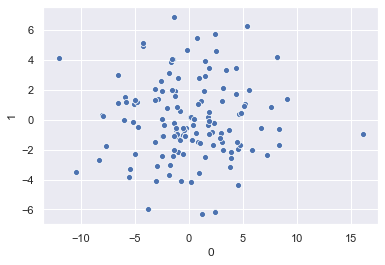

In [49]:
sns.scatterplot(x=0, y=1, data=df_pca_transformed_normed)

## Clustering

In [50]:
def Do_Clustering_KMeans(components=2, data=df_pca_transformed_normed):
    ##
    clusterer = KMeans(n_clusters=components, random_state=0).fit(data)

    preds = clusterer.predict(data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    
    return score, preds, centers




### Finding Best Number of Clusters

In [51]:
number_of_components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for n_components in number_of_components:
    score, _, _ = Do_Clustering_KMeans(components=n_components)
    print('With {} clusters, the silhouette coefficient is {:.3f}.'.format(n_components, score))

With 2 clusters, the silhouette coefficient is 0.232.
With 3 clusters, the silhouette coefficient is 0.177.
With 4 clusters, the silhouette coefficient is 0.195.
With 5 clusters, the silhouette coefficient is 0.168.
With 6 clusters, the silhouette coefficient is 0.197.
With 7 clusters, the silhouette coefficient is 0.184.
With 8 clusters, the silhouette coefficient is 0.175.
With 9 clusters, the silhouette coefficient is 0.150.
With 10 clusters, the silhouette coefficient is 0.177.
With 11 clusters, the silhouette coefficient is 0.161.
With 12 clusters, the silhouette coefficient is 0.161.
With 13 clusters, the silhouette coefficient is 0.166.
With 14 clusters, the silhouette coefficient is 0.177.


### Clusters

In [52]:
def cluster_results(reduced_data, preds, centers, first_axis=0, second_axis=1, pca_samples=None):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = first_axis, y = second_axis, 
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    if pca_samples is not None:
        ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
                   s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA Data - Centroids Marked by Number");

In [53]:
_, preds, centers = Do_Clustering_KMeans(components=2)

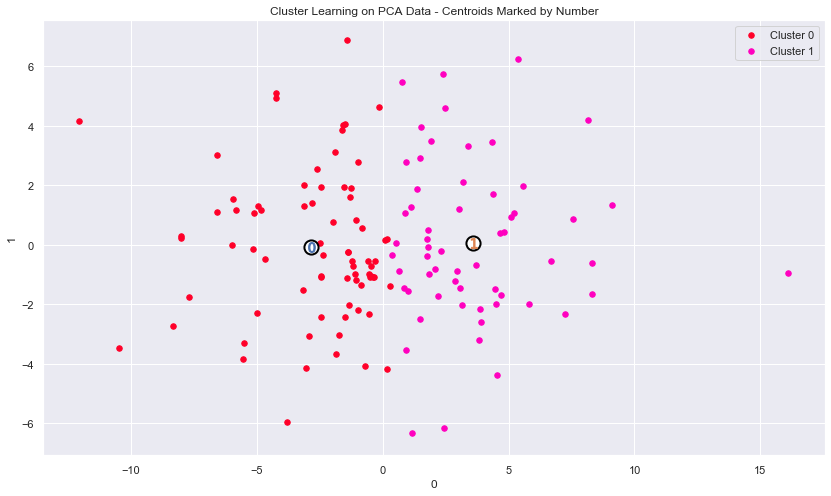

In [54]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=1)

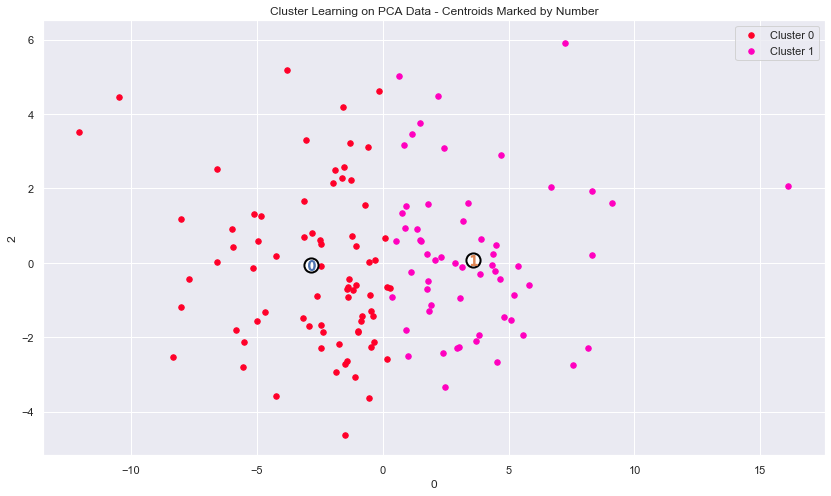

In [55]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=2)

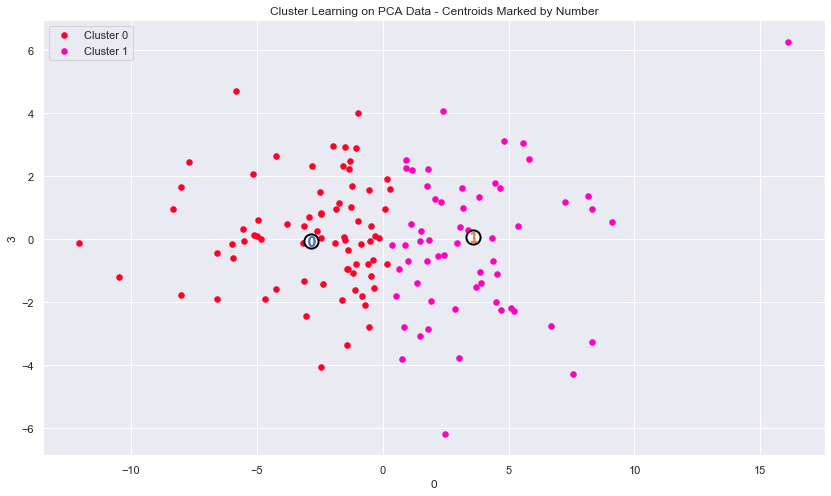

In [56]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=3)

In [147]:
df_transformed_normed.index[np.argmax(df_pca_transformed_normed[0])]

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


'Kahului-Wailuku-Lahaina'

In [148]:
df_transformed_normed.index[np.argmin(df_pca_transformed_normed[0])]

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


'Warren-Troy-Farmington Hills'

## Principal Component Importance

In [132]:
dict_comp_feat = {}
for i, comp_original in enumerate(pca.components_):
    comp = np.abs(comp_original)
#     print(comp)
    out_arr = np.argsort(comp)
    out_arr = np.flip(out_arr)
    out_arr_first_ten = out_arr[0:20]
    dict_temp = {}
    dict_temp['importances'] = comp_original[out_arr_first_ten]
    dict_temp['features'] = df_transformed_normed.columns[out_arr_first_ten]
    dict_comp_feat[i] = dict_temp
    

In [134]:
def pca_importance(comp=None, dict_comp_feat=None, pca=None):

    ratios = pca.explained_variance_ratio_ #.reshape(len(pca.components_), 1)

    plt.figure(figsize=(14,8));
    
    components = dict_comp_feat[comp]
    components = pd.DataFrame(components)

    # Plot the feature weights as a function of the components
    explained_variance_ratio = pca.explained_variance_ratio_[comp]
    g = sns.barplot(x="features", y="importances", data=components)
    g.set_title("component {}, explained_variance_ratio is {:.2f}".format(comp, explained_variance_ratio))
    
    g.set_xticklabels(g.get_xticklabels(), rotation=45)

    return

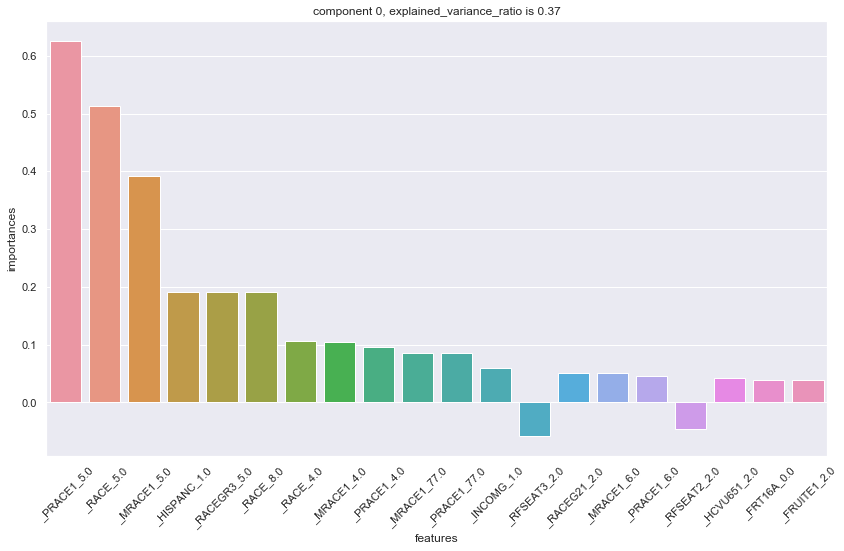

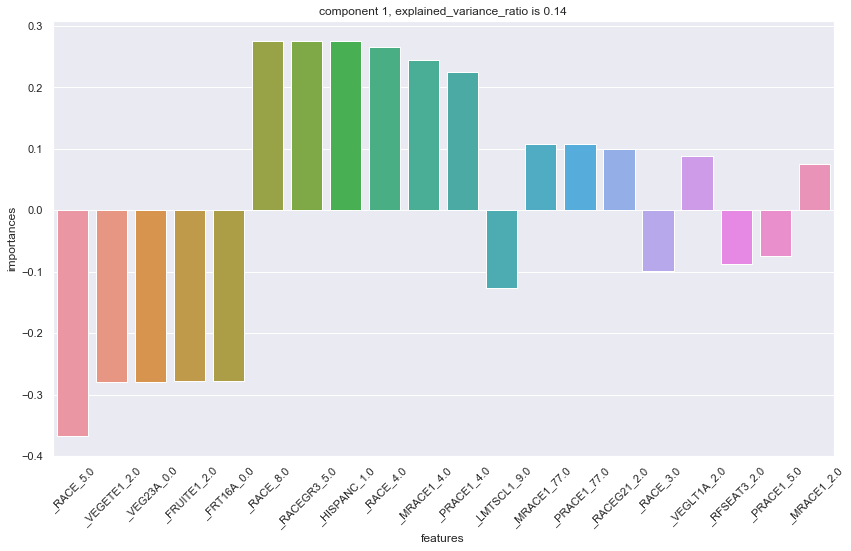

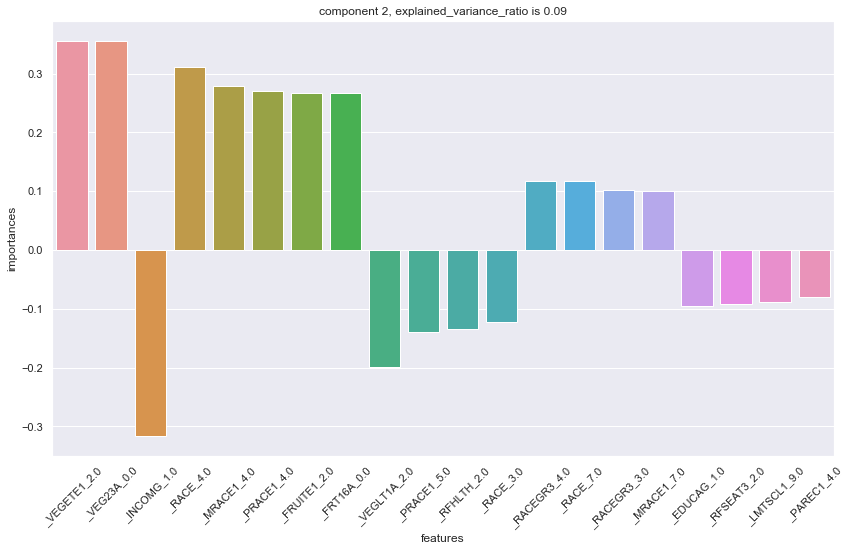

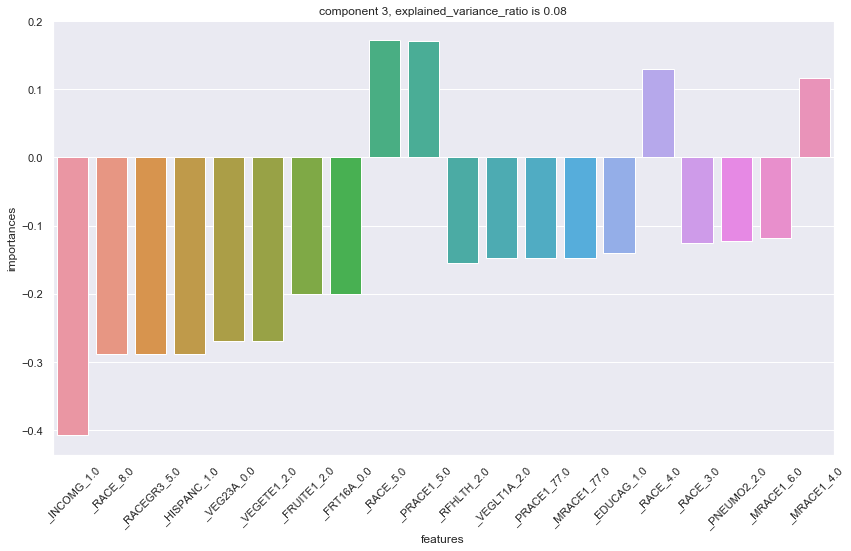

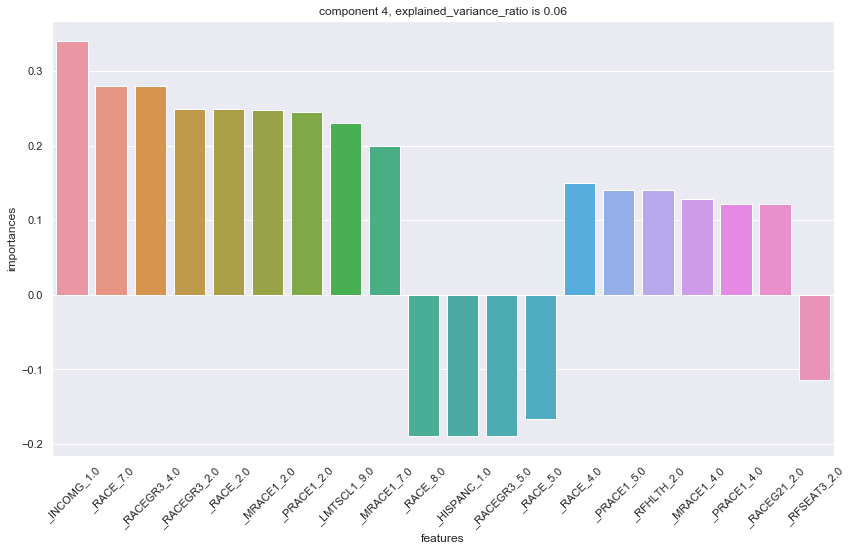

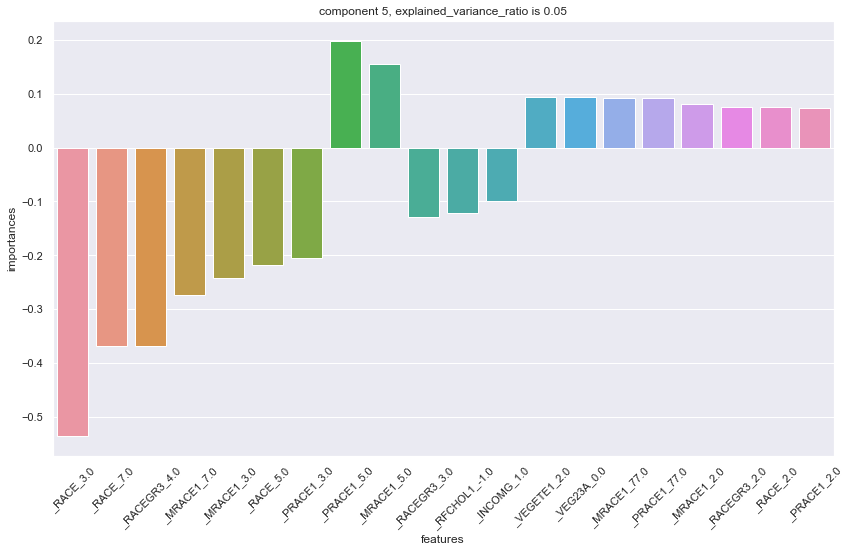

In [135]:
for comp in range(len(pca.components_)):
    pca_importance(comp=comp, dict_comp_feat=dict_comp_feat, pca=pca)